# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [6]:
# Import essential libraries for data manipulation and analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [9]:
# Importing the file porter_data_1.csv

df = pd.read_csv('porter_data_1.csv')
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [13]:
df.describe()

market_id  store_primary_category  order_protocol    total_items  \
count  175777.000000           175777.000000   175777.000000  175777.000000   
mean        2.743726               35.887949        2.911752       3.204976   
std         1.330963               20.728254        1.513128       2.674055   
min         1.000000                0.000000        1.000000       1.000000   
25%         2.000000               18.000000        1.000000       2.000000   
50%         2.000000               38.000000        3.000000       3.000000   
75%         4.000000               55.000000        4.000000       4.000000   
max         6.000000               72.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  175777.000000       175777.000000   175777.000000   175777.000000   
mean     2697.111147            2.675060      684.965433     1160.158616   
std      1828.554893            1.625681      519.882924      560.828571   
min         0.000000            1.000000      -86.000000        0.000000   
25%      1412.000000            1.000000      299.000000      799.000000   
50%      2224.000000            2.000000      595.000000     1095.000000   
75%      3410.000000            3.000000      942.000000     1395.000000   
max     26800.000000           20.000000    14700.000000    14700.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          175777.000000       175777.000000             175777.000000   
mean               44.918664           41.861381                 58.230115   
std                34.544724           32.168505                 52.731043   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                285.000000   

            distance  
count  175777.000000  
mean       21.843090  
std         8.748712  
min         0.000000  
25%        15.360000  
50%        21.760000  
75%        28.120000  
max        83.520000

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [19]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

In [21]:
df[['created_at', 'actual_delivery_time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 2 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   created_at            175777 non-null  datetime64[ns]
 1   actual_delivery_time  175777 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 2.7 MB


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [24]:
# Convert categorical features to category type

cat_vars = ['market_id', 'store_primary_category', 'order_protocol']

df[cat_vars] = df[cat_vars].astype('int').astype('category')

In [26]:
df[cat_vars].head(3)

market_id store_primary_category order_protocol
0         1                      4              1
1         2                     46              2
2         2                     36              3

In [28]:
df[cat_vars].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   market_id               175777 non-null  category
 1   store_primary_category  175777 non-null  category
 2   order_protocol          175777 non-null  category
dtypes: category(3)
memory usage: 517.4 KB


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [32]:
# Calculate time taken in minutes
df['time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds()/60

In [34]:
df[['time_taken']].head()

time_taken
0        47.0
1        44.0
2        55.0
3        59.0
4        46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [37]:
# Extract the hour and day of week from the 'created_at' timestamp
df['hour'] = df['created_at'].dt.hour
df['day'] = df['created_at'].dt.day_of_week

# Create a categorical feature 'isWeekend'

df['isWeekend'] = df['day'].apply(lambda x : 1 if x in (5,6) else 0)


In [39]:
df.head(3)

market_id          created_at actual_delivery_time store_primary_category  \
0         1 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1         2 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2         2 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0              1            4      3441                   4             557   
1              2            1      1900                   1            1400   
2              3            4      4771                   3             820   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   

   total_outstanding_orders  distance  time_taken  hour  day  isWeekend  
0                      21.0     34.44        47.0    22    4          0  
1                       2.0     27.60        44.0    21    1          0  
2                      18.0     11.56        55.0     0    0          0

In [41]:
# Drop unnecessary columns
df.drop(columns= ['created_at', 'actual_delivery_time'], inplace= True)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [45]:
# Define target variable (y) and features (X)
y = df['time_taken']
X = df.drop(columns= 'time_taken')

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [48]:
# Split data into training and testing sets

df_train, df_test = train_test_split(df, train_size= 0.8, test_size= 0.2, random_state= 50)

In [50]:
print(df_train.shape)
print(df_test.shape)

(140621, 16)
(35156, 16)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [54]:
# Define numerical and categorical columns for easy EDA and data manipulation

num_vars = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
           'total_outstanding_orders', 'distance', 'hour']

cat_vars = ['market_id', 'store_primary_category', 'order_protocol', 'day', 'isWeekend']

print('The Numerical features are :')
for col in num_vars:
    print(col)
print(f"\n{'-'*50}\n")

print('The Categorical features are :')
for col in cat_vars:
    print(col)
print('\n')

The Numerical features are :
total_items
subtotal
num_distinct_items
min_item_price
max_item_price
total_onshift_dashers
total_busy_dashers
total_outstanding_orders
distance
hour

--------------------------------------------------

The Categorical features are :
market_id
store_primary_category
order_protocol
day
isWeekend




##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

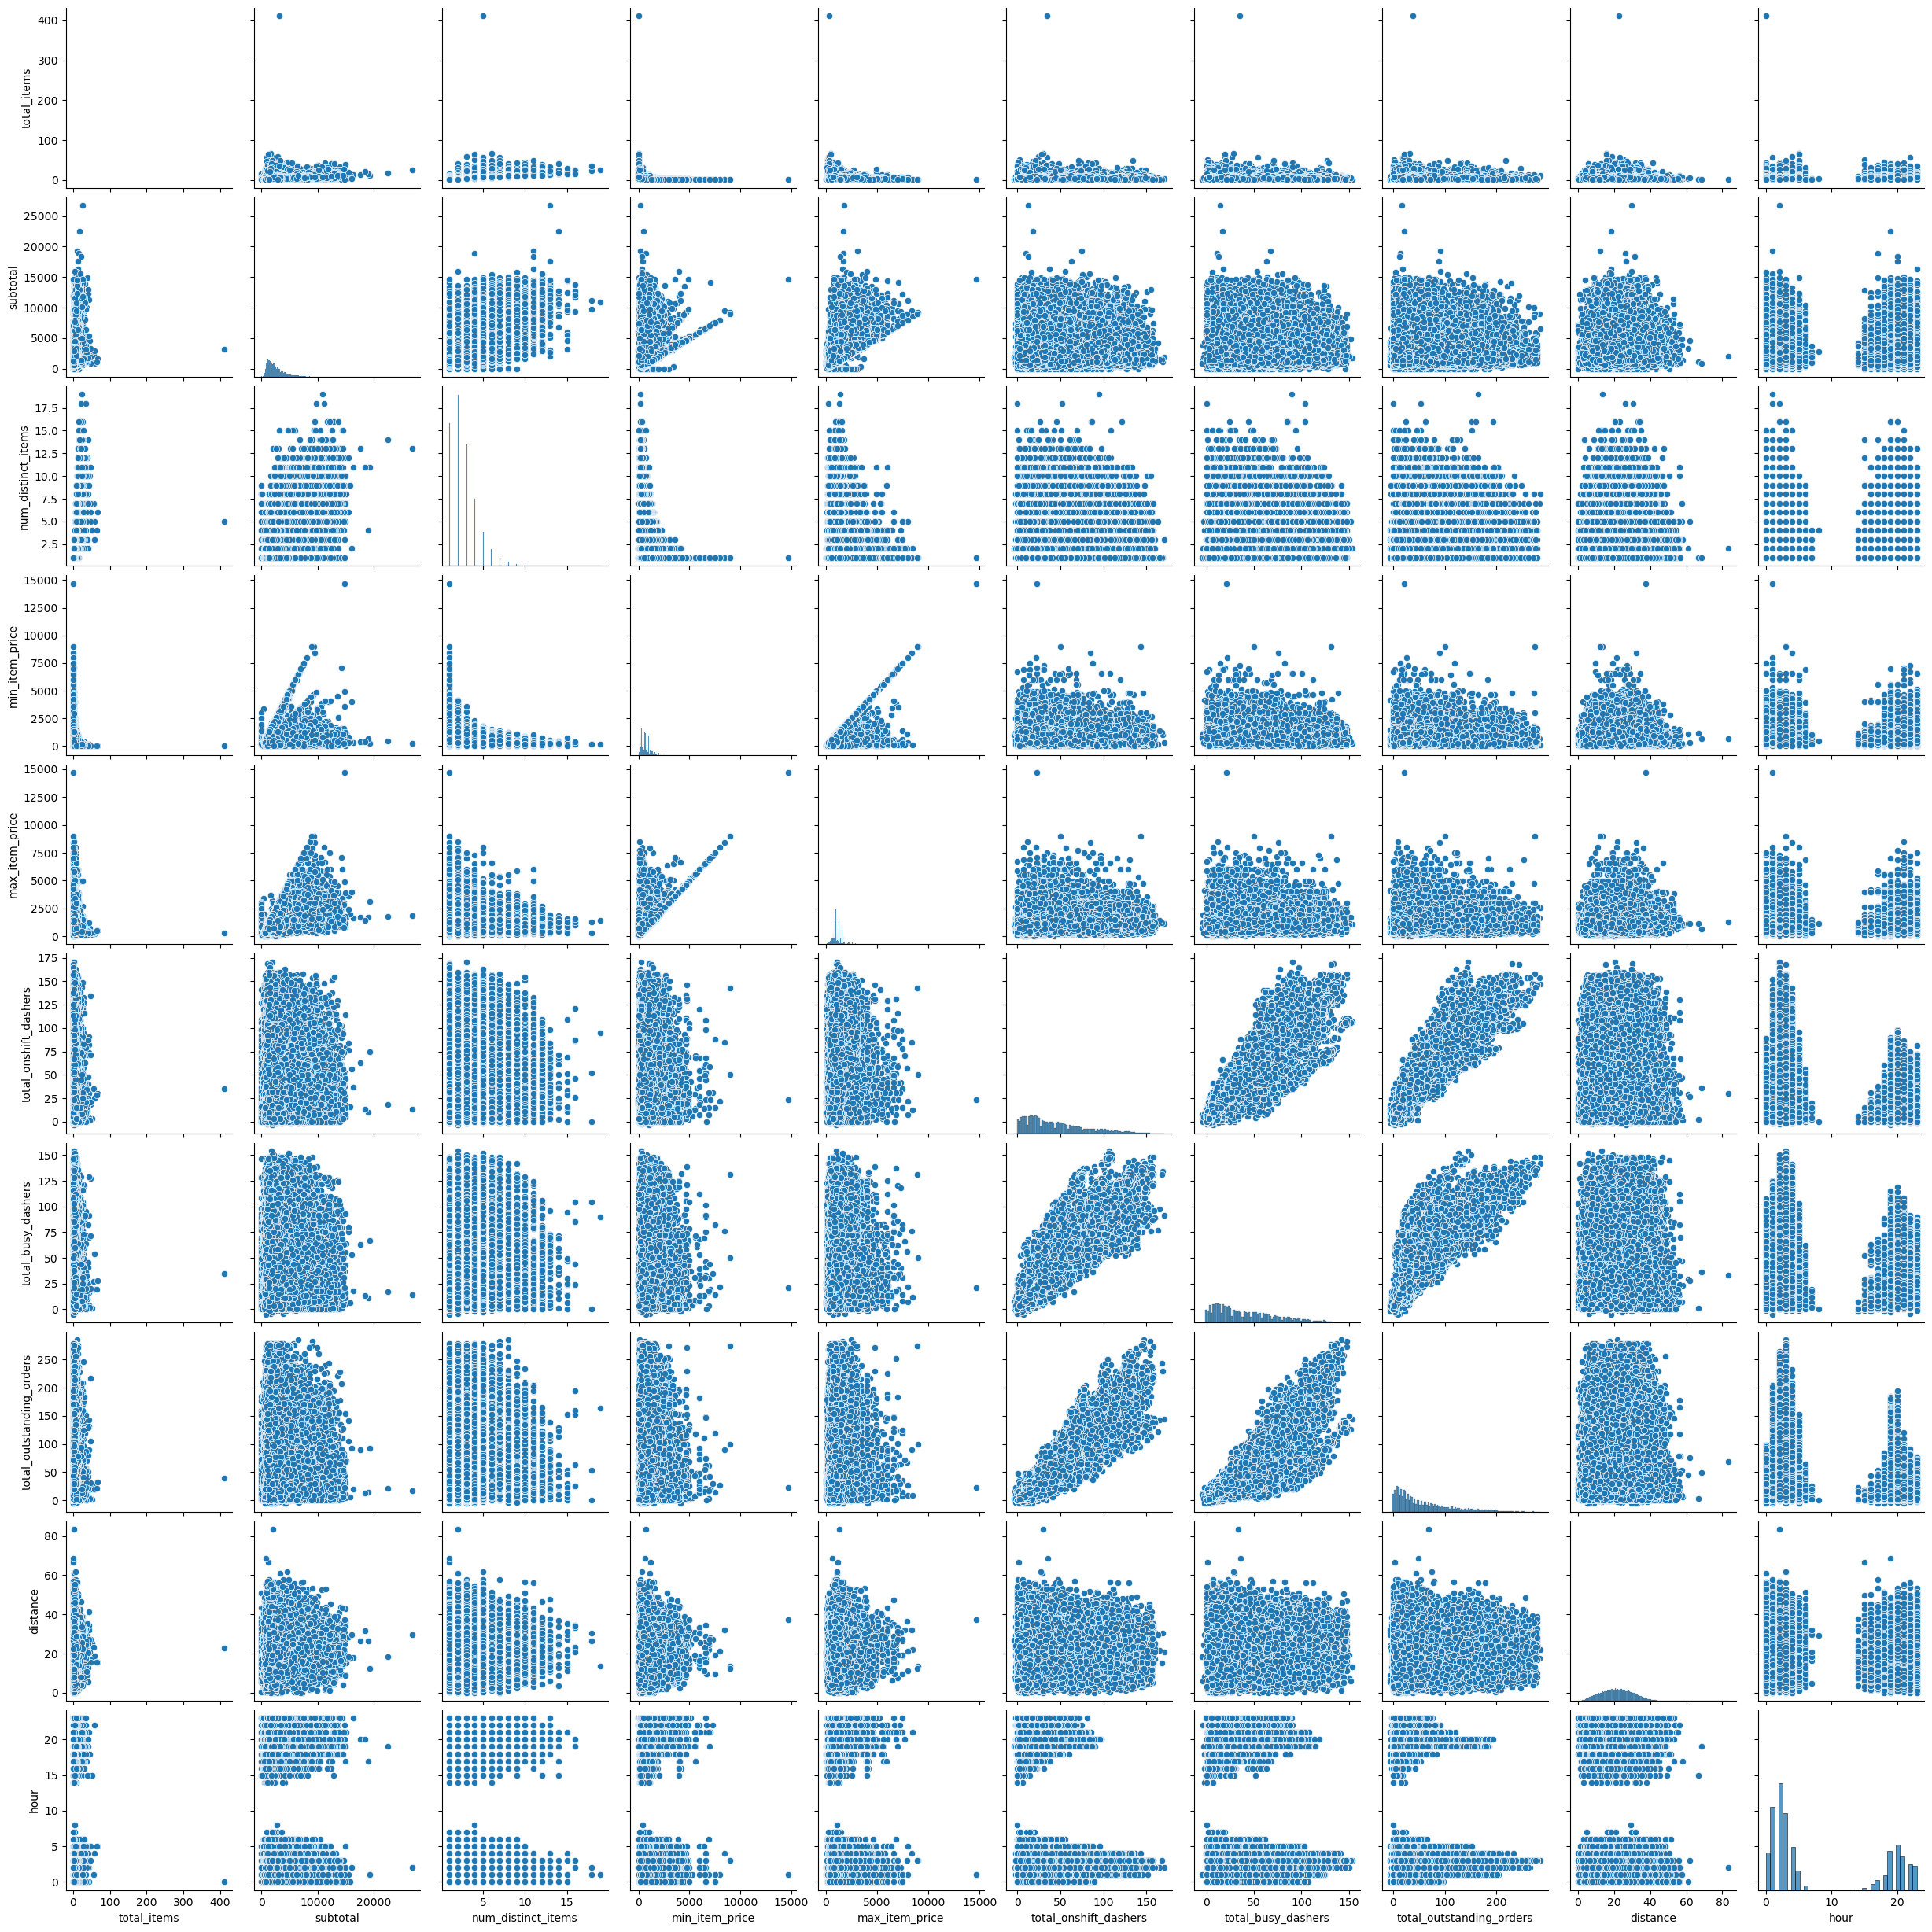

In [57]:
# Plot distributions for all numerical columns

sns.pairplot(data= df_train[num_vars], aspect= 1)
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

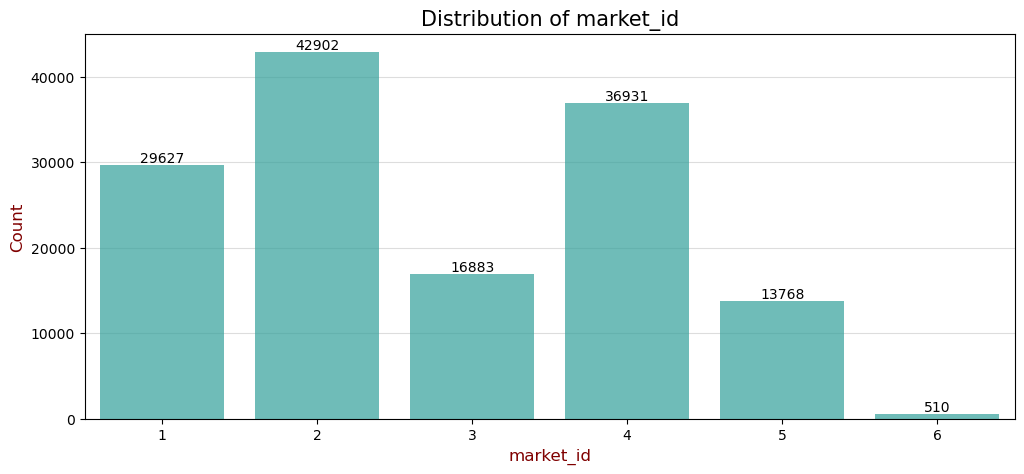

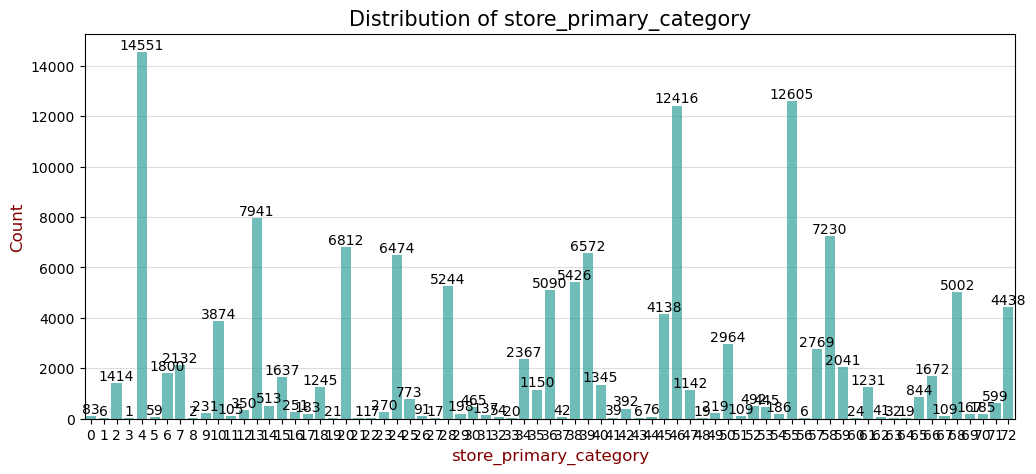

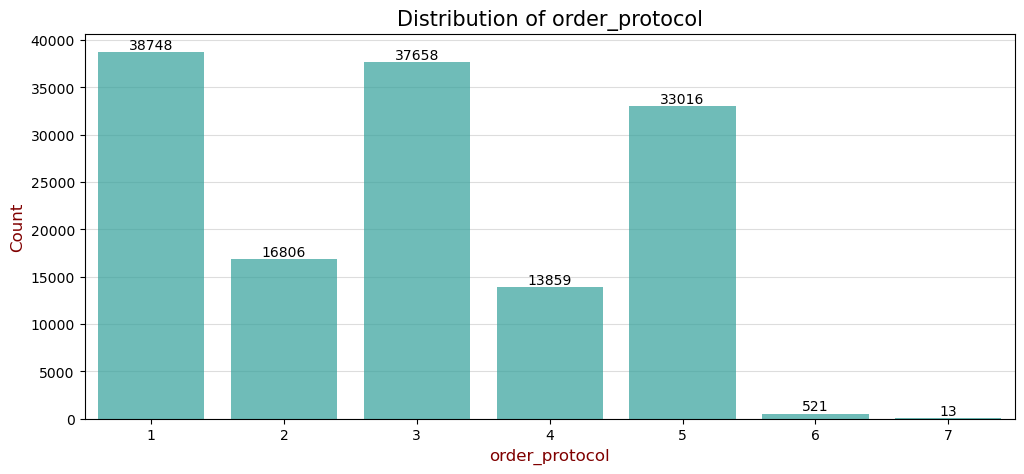

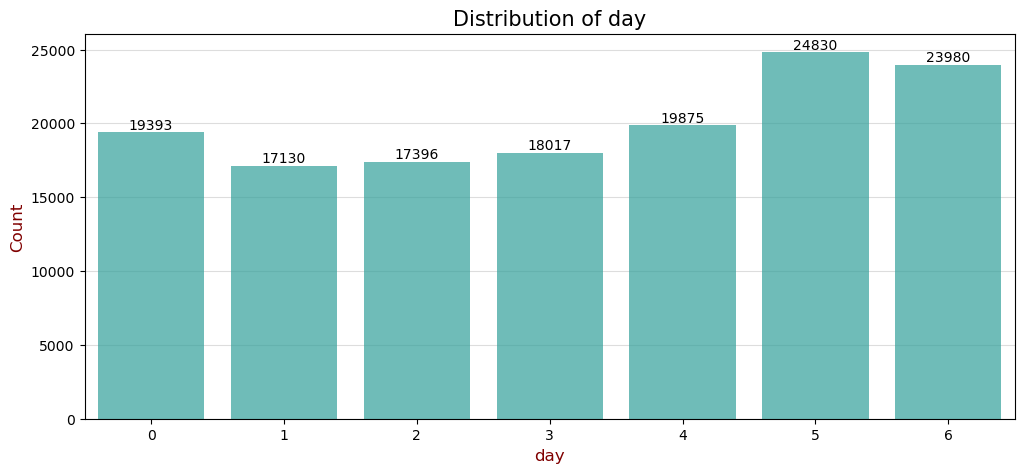

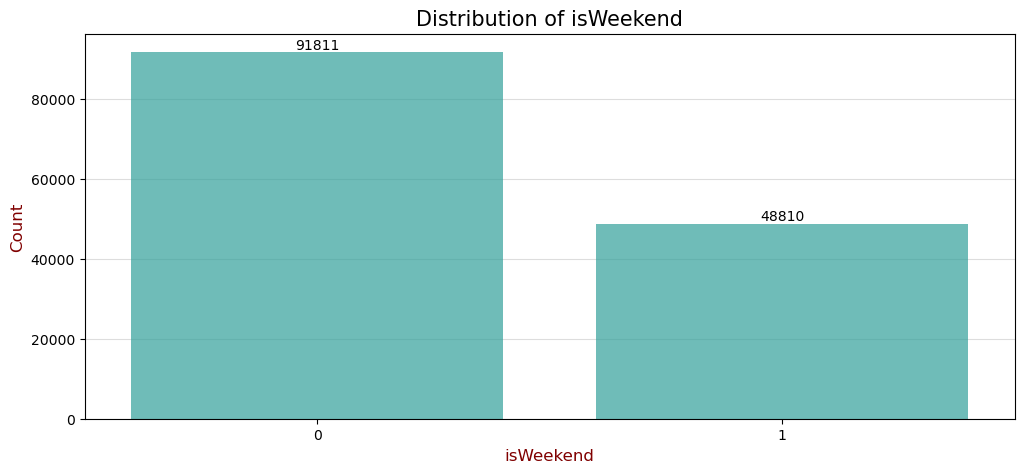

In [59]:
# Distribution of categorical columns

for col in cat_vars:
    # df_train[col].value_counts().plot(kind = 'bar', figsize = (12, 5), color= 'lightseagreen')
    # plt.title(f'Distribution of {col}')
    # plt.show()
    plt.figure(figsize= (12,5))
    plt.grid(color= '#DDDDDD')

    ax = sns.barplot(data= df_train.groupby(col)[col].count(), color= 'lightseagreen', alpha= 0.7)

    ax.set_axisbelow(True)
    for i in ax.containers:
        ax.bar_label(i, )
    
    plt.title(f'Distribution of {col}', fontdict= {'fontsize': 15, 'fontweight': 50})
    plt.xlabel(f'{col}', fontdict= {'fontsize': 12, 'fontweight': 50, 'color': 'Maroon'})
    plt.ylabel('Count', fontdict= {'fontsize': 12, 'fontweight': 50, 'color': 'Maroon'})

    plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

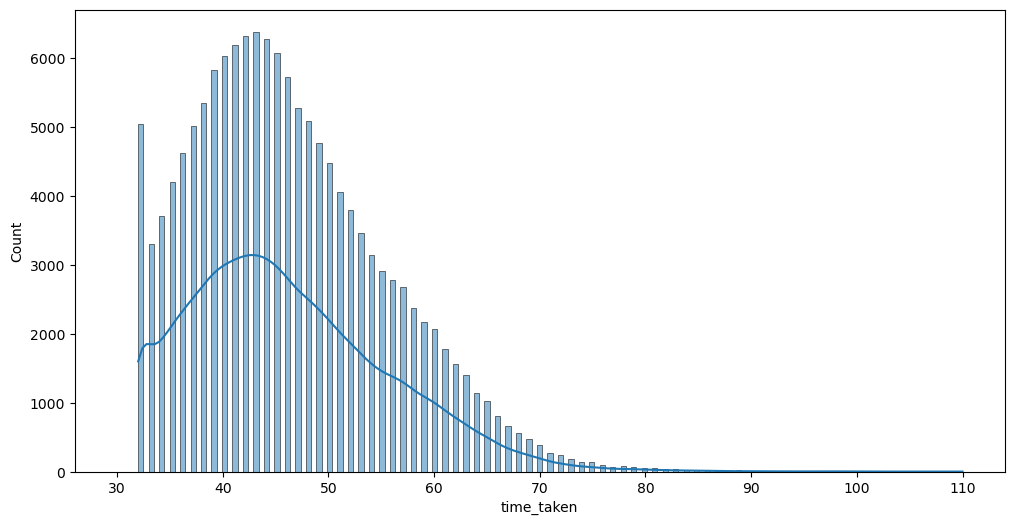

In [63]:
# Distribution of time_taken

plt.figure(figsize= (12,6))
sns.histplot(df_train['time_taken'], kde= True, binrange=[30,100])

plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

<Figure size 1200x600 with 0 Axes>

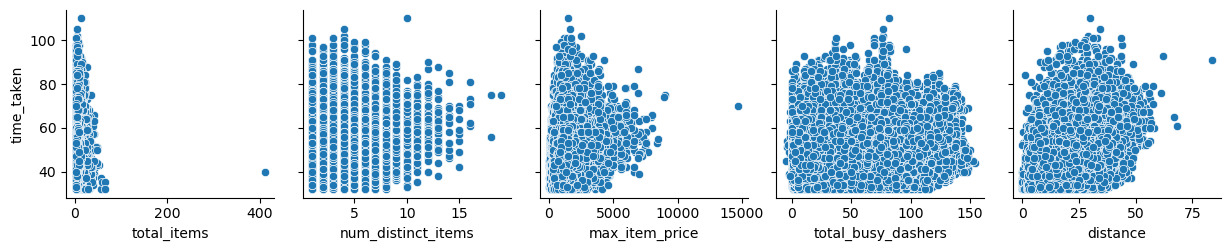

<Figure size 1200x600 with 0 Axes>

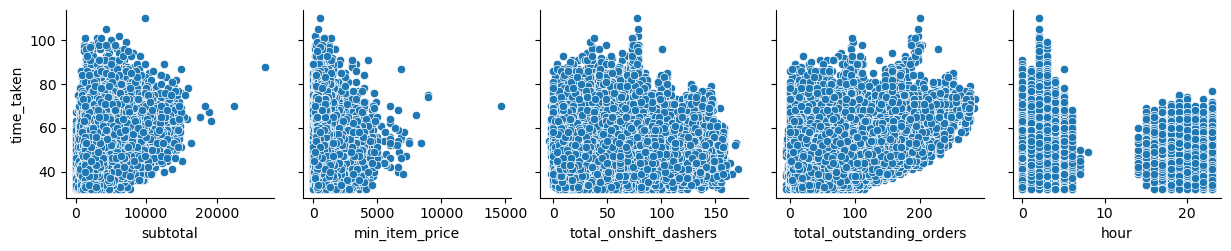

In [67]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize= (12,6))
sns.pairplot(data= df_train, x_vars= num_vars[::2], y_vars= 'time_taken')
plt.show()

plt.figure(figsize= (12,6))
sns.pairplot(data= df_train, x_vars= num_vars[1::2], y_vars= 'time_taken')
plt.show()


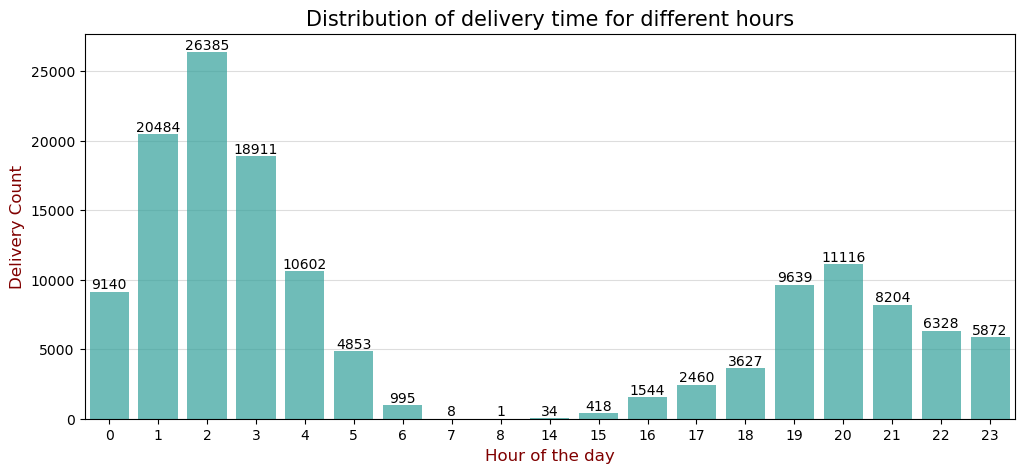

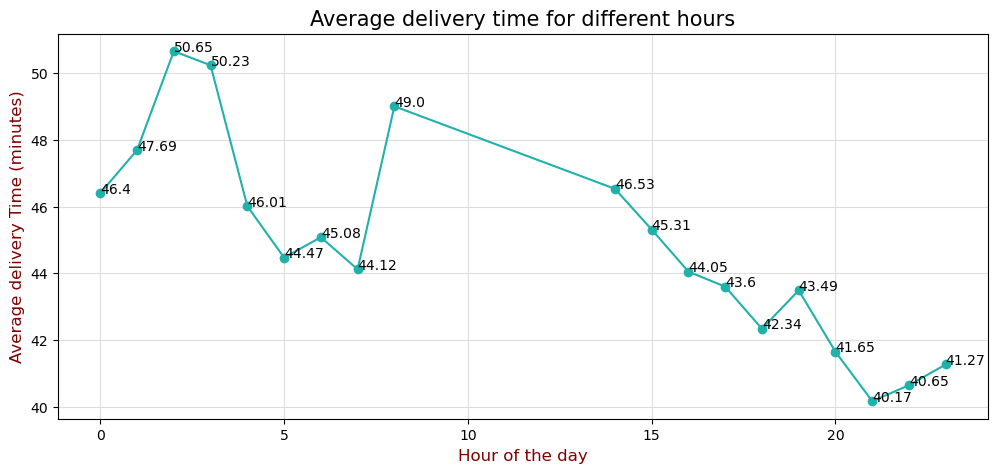

In [69]:
# Show the distribution of time_taken for different hours


plt.figure(figsize= (12,5))
plt.grid(color= '#DDDDDD')

ax = sns.barplot(data= df_train.groupby('hour')['time_taken'].count(), color= 'lightseagreen', alpha= 0.7)

ax.set_axisbelow(True)
for i in ax.containers:
    ax.bar_label(i, )
    
plt.title('Distribution of delivery time for different hours', fontdict= {'fontsize': 15, 'fontweight': 50})
plt.xlabel('Hour of the day', fontdict= {'fontsize': 12, 'fontweight': 50, 'color': 'Maroon'})
plt.ylabel('Delivery Count', fontdict= {'fontsize': 12, 'fontweight': 50, 'color': 'Maroon'})

plt.show()



plt.figure(figsize= (12,5))
plt.grid(color= '#DDDDDD')
grouped_time = df_train.groupby('hour')['time_taken'].mean().round(2)
ax= plt.plot(grouped_time, 'o-', color= 'lightseagreen')

for xy in zip(grouped_time.index, grouped_time.values):
    plt.annotate(text= f'{ xy[1] }', xy= xy, textcoords= 'data')
    
plt.title('Average delivery time for different hours', fontdict= {'fontsize': 15, 'fontweight': 50})
plt.xlabel('Hour of the day', fontdict= {'fontsize': 12, 'fontweight': 50, 'color': 'Maroon'})
plt.ylabel('Average delivery Time (minutes)', fontdict= {'fontsize': 12, 'fontweight': 50, 'color': 'Maroon'})

plt.show()



#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

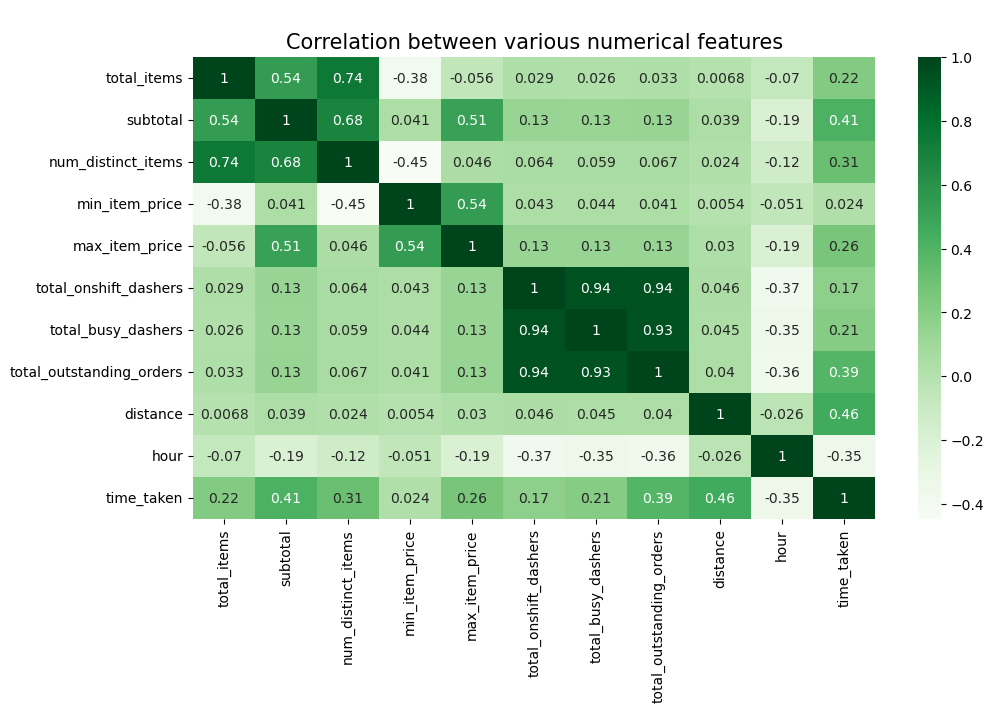

In [73]:
# Plot the heatmap of the correlation matrix

plt.figure(figsize= (11,6))
sns.heatmap(df_train[num_vars + ['time_taken']].corr(), annot= True, cmap= 'Greens')
plt.title('\nCorrelation between various numerical features', fontdict= {'fontsize': 15, 'fontweight': 50})
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [76]:
# Drop 3-5 weakly correlated columns from training dataset

weak_corr_vars = ['min_item_price', 'total_onshift_dashers']
df_train.drop(columns= weak_corr_vars, inplace= True)

unnecesary_cat_vars = ['store_primary_category', 'day']
df_train.drop(columns= unnecesary_cat_vars, inplace= True)

In [78]:
# updating list of numerical features 

num_vars = [item for item in num_vars if item not in weak_corr_vars]
cat_vars = [item for item in cat_vars if item not in unnecesary_cat_vars]


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

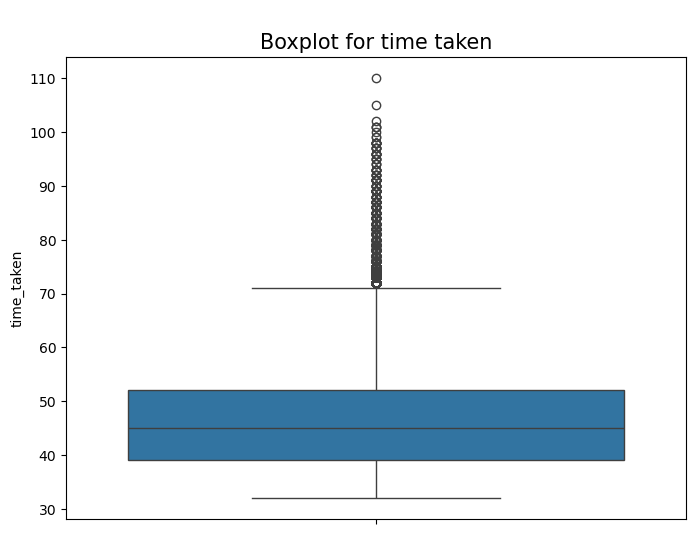

In [82]:
# Boxplot for time_taken

plt.figure(figsize= (8,6))
sns.boxplot(df_train['time_taken'])
plt.title('\nBoxplot for time taken', fontdict= {'fontsize': 15, 'fontweight': 50})
plt.show()

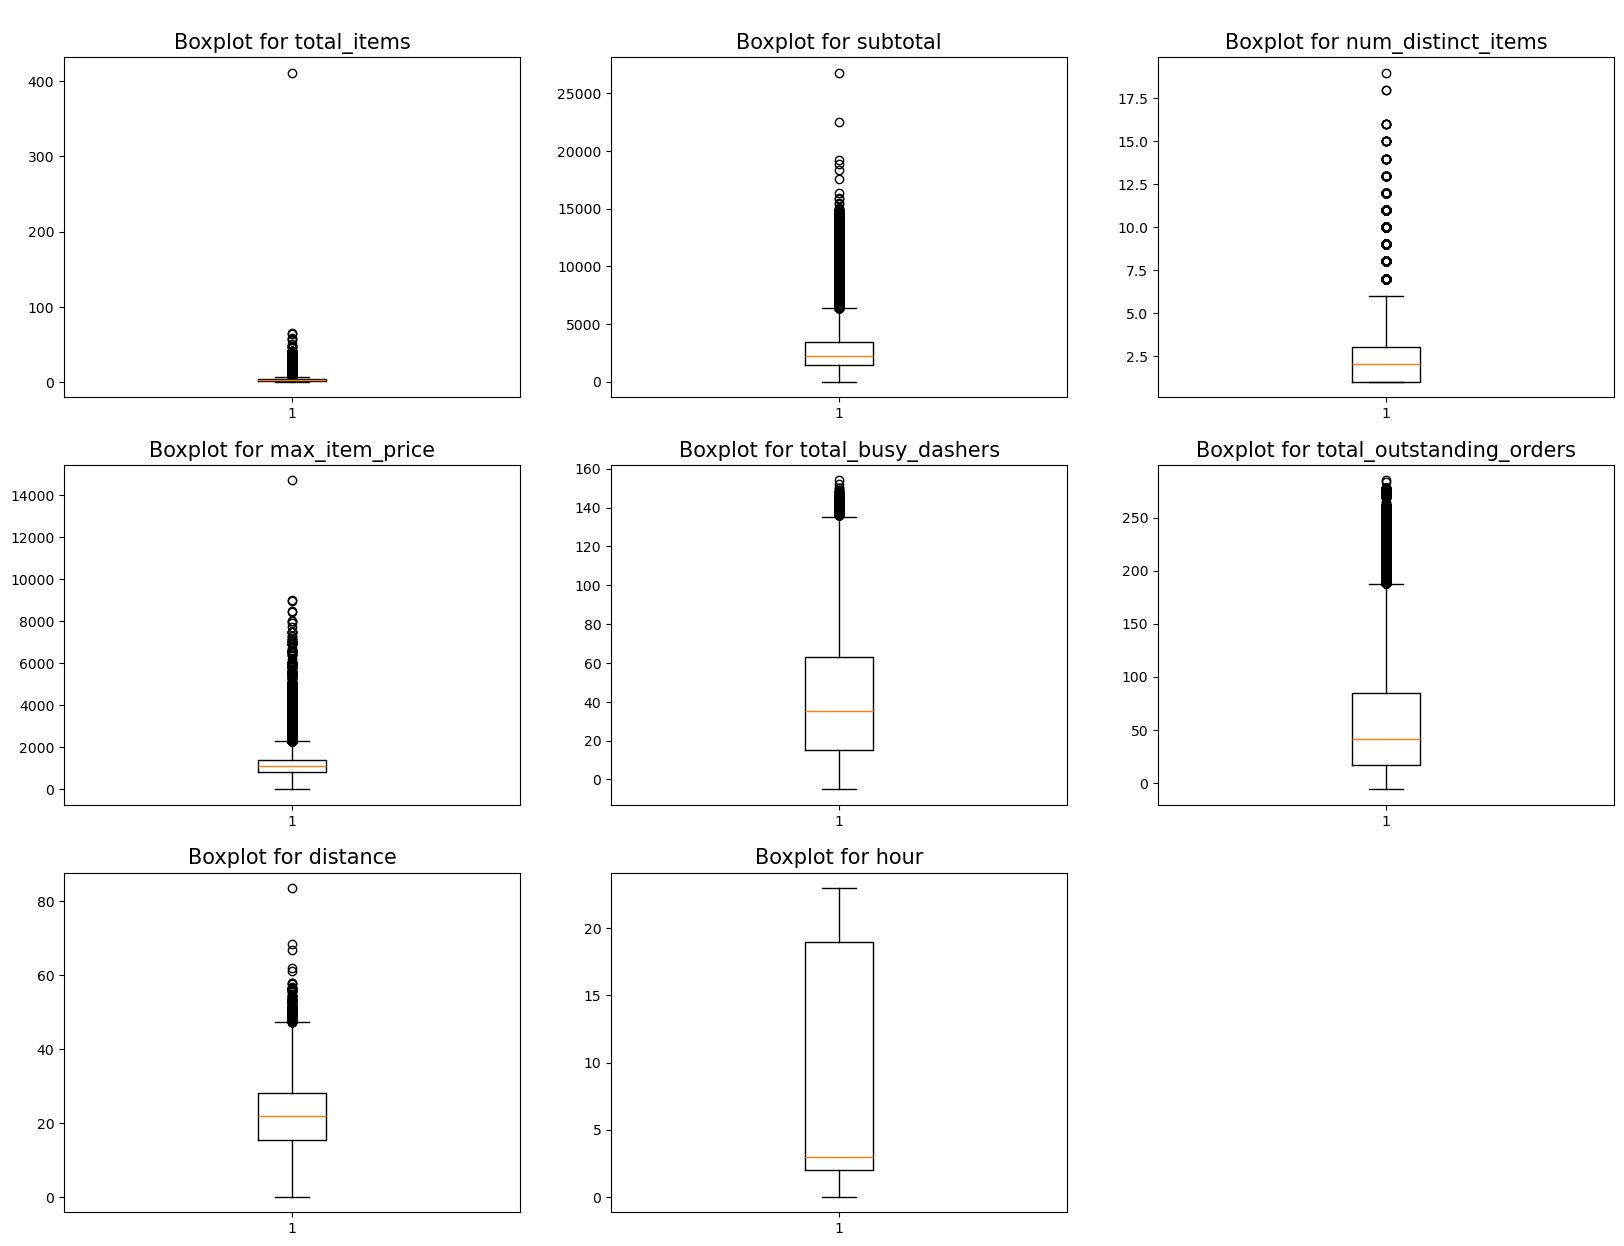

In [83]:
# Box plot of numerical features

plt.figure(figsize= (20, 15))
for i, col in enumerate(num_vars):
    plt.subplot(3,3,i+1)
    plt.boxplot(df_train[col])
    plt.title(f'\nBoxplot for {col}', fontdict= {'fontsize': 15, 'fontweight': 50})

plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [87]:
# Handle outliers

# Define a function to remove outliers using the IQR method
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from all numerical columns
df_train = remove_outliers(df_train, num_vars+ ['time_taken'])
# Verify the changes
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118817 entries, 92179 to 145072
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 118817 non-null  category
 1   order_protocol            118817 non-null  category
 2   total_items               118817 non-null  int64   
 3   subtotal                  118817 non-null  int64   
 4   num_distinct_items        118817 non-null  int64   
 5   max_item_price            118817 non-null  int64   
 6   total_busy_dashers        118817 non-null  float64 
 7   total_outstanding_orders  118817 non-null  float64 
 8   distance                  118817 non-null  float64 
 9   time_taken                118817 non-null  float64 
 10  hour                      118817 non-null  int32   
 11  isWeekend                 118817 non-null  int64   
dtypes: category(2), float64(4), int32(1), int64(5)
memory usage: 9.7 MB


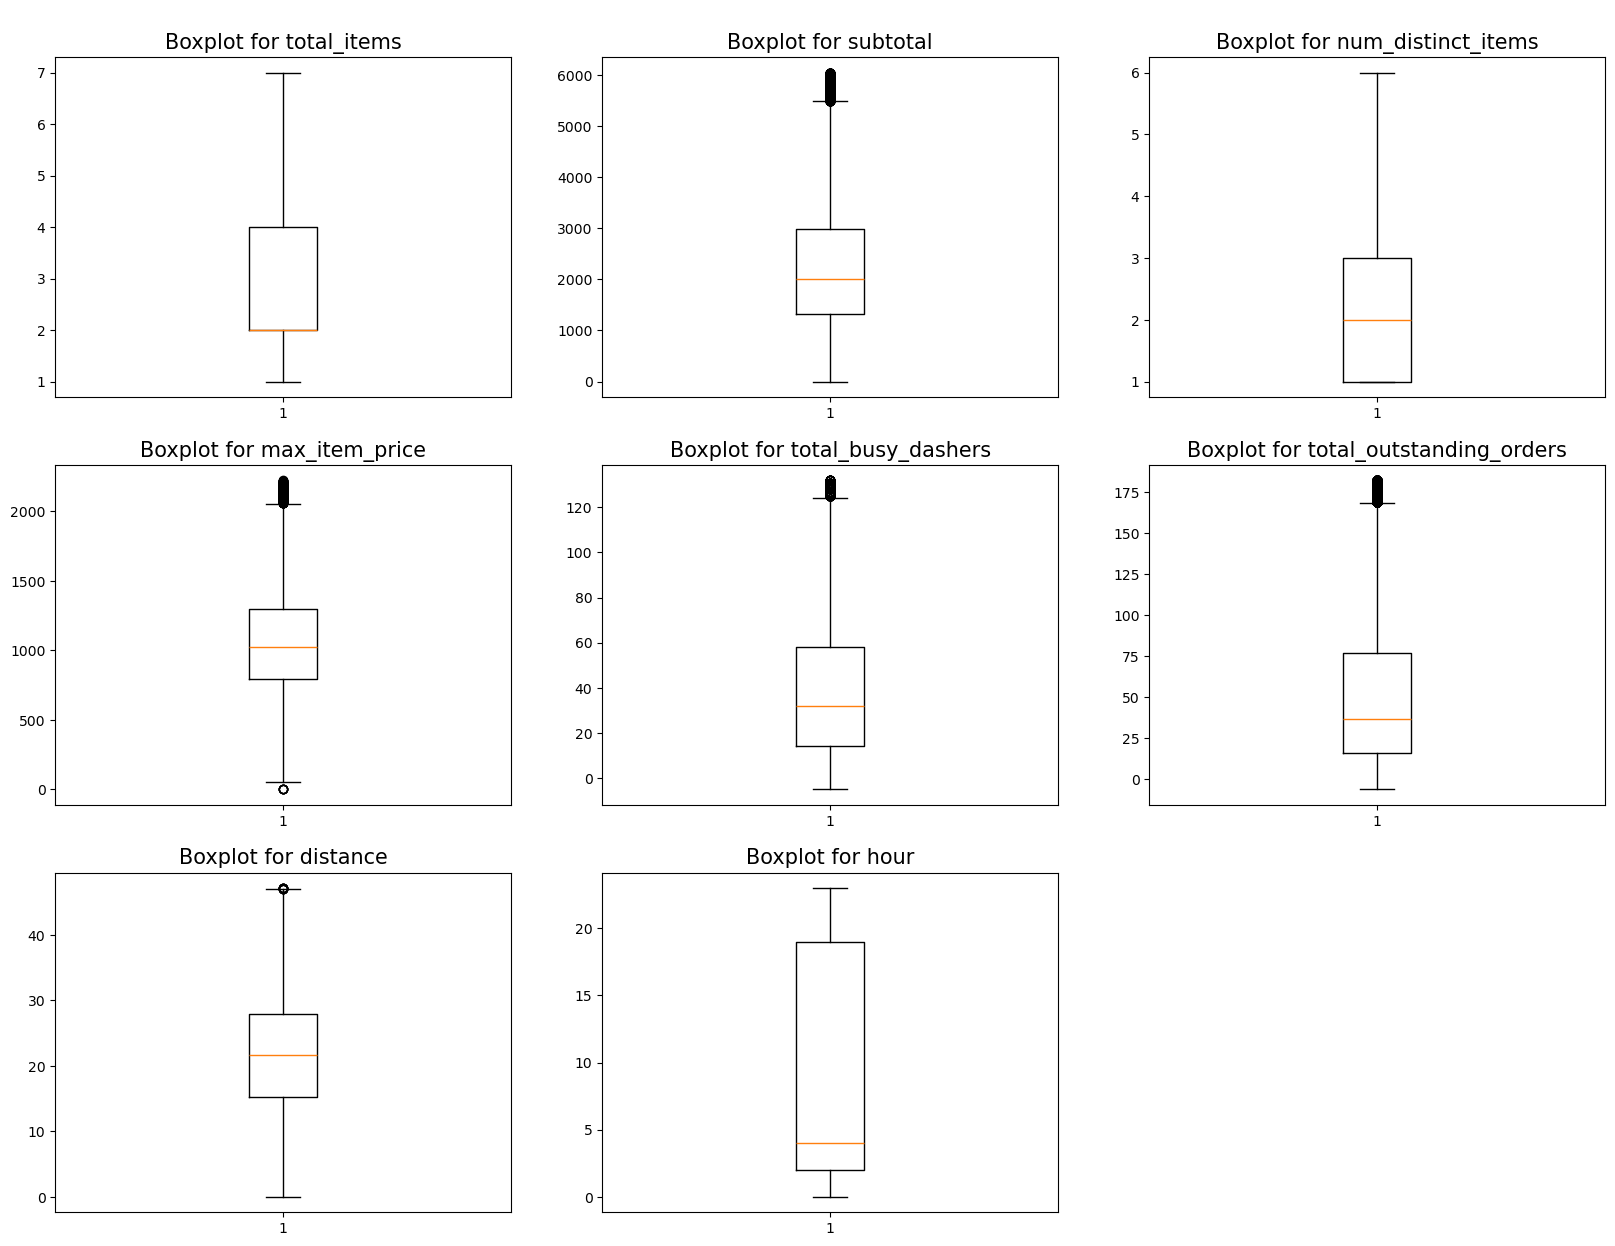

In [89]:

plt.figure(figsize= (20, 15))
for i, col in enumerate(num_vars):
    plt.subplot(3,3,i+1)
    plt.boxplot(df_train[col])
    plt.title(f'\nBoxplot for {col}', fontdict= {'fontsize': 15, 'fontweight': 50})

plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [92]:
# Define numerical and categorical columns for easy EDA and data manipulation

num_vars = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
           'total_outstanding_orders', 'distance', 'hour']

cat_vars = ['market_id', 'store_primary_category', 'order_protocol', 'day', 'isWeekend']

print('The Numerical features are :')
for col in num_vars:
    print(col)
print(f"\n{'-'*50}\n")

print('The Categorical features are :')
for col in cat_vars:
    print(col)
print('\n')

The Numerical features are :
total_items
subtotal
num_distinct_items
min_item_price
max_item_price
total_onshift_dashers
total_busy_dashers
total_outstanding_orders
distance
hour

--------------------------------------------------

The Categorical features are :
market_id
store_primary_category
order_protocol
day
isWeekend




#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

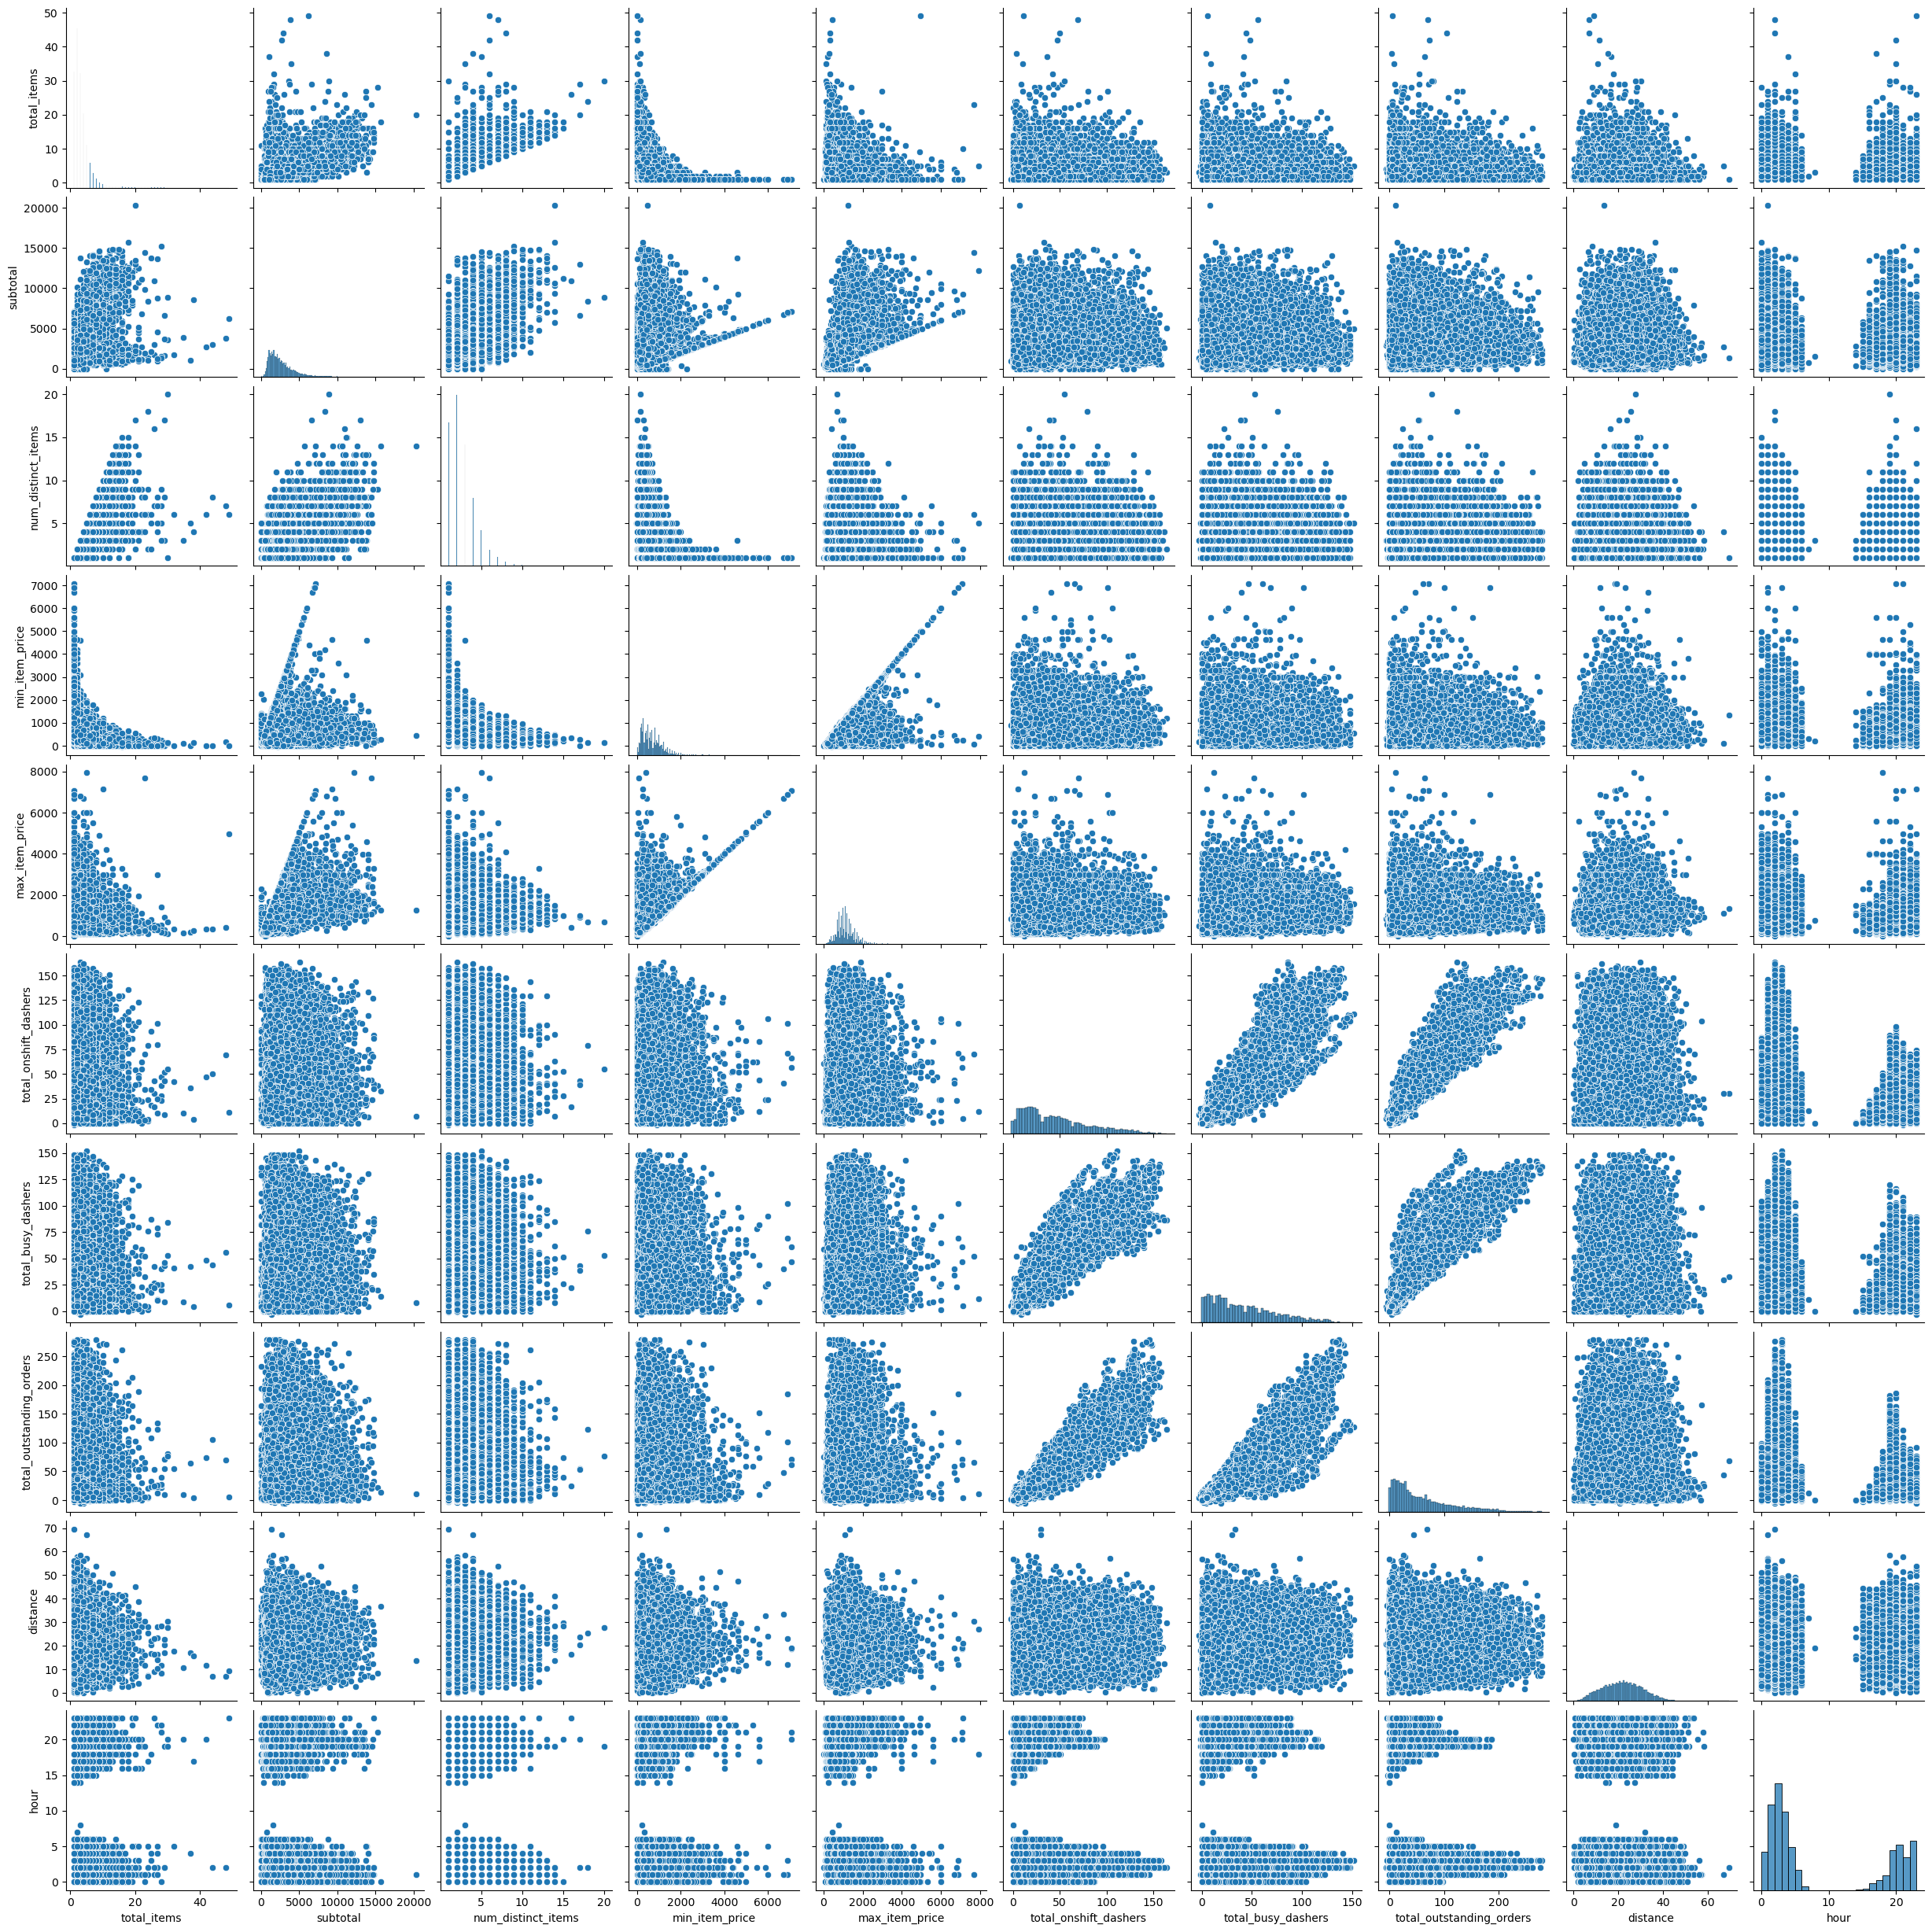

In [96]:
# Plot distributions for all numerical columns

sns.pairplot(data= df_test[num_vars], aspect= 1)
plt.show()

##### **4.1.2**
Check the distribution of categorical features

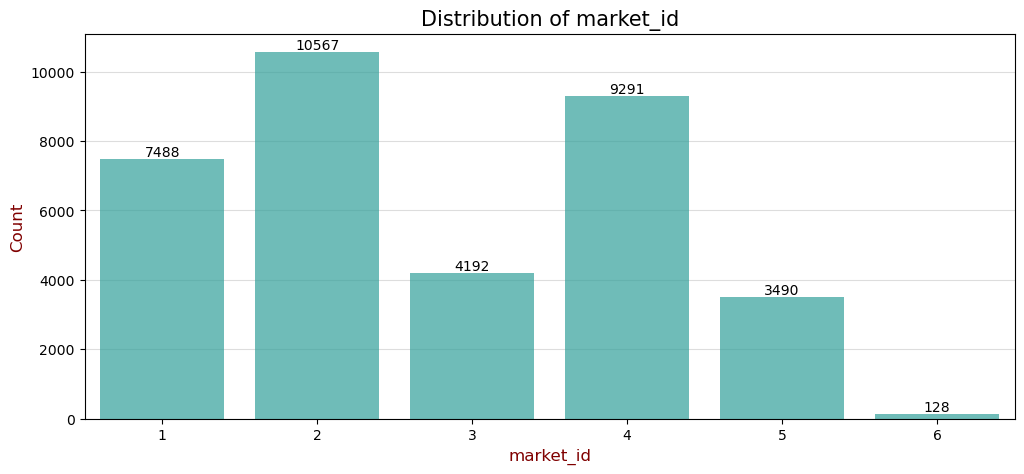

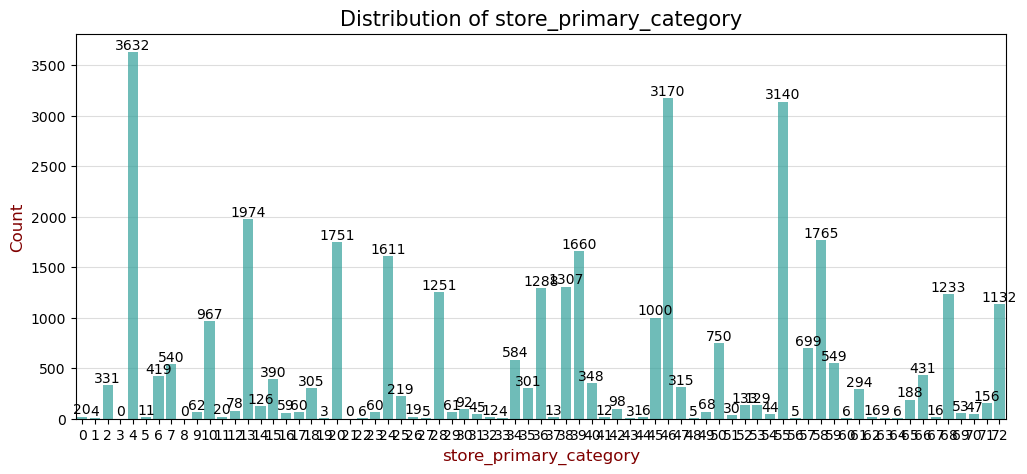

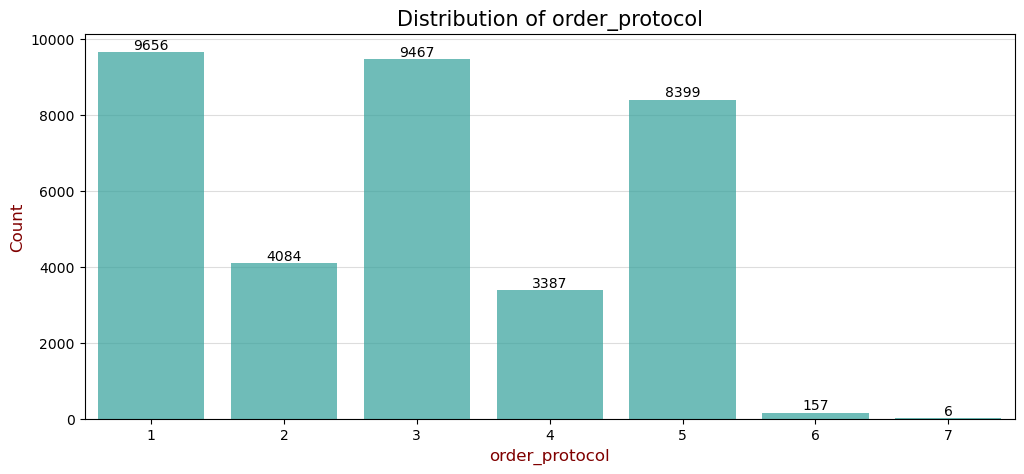

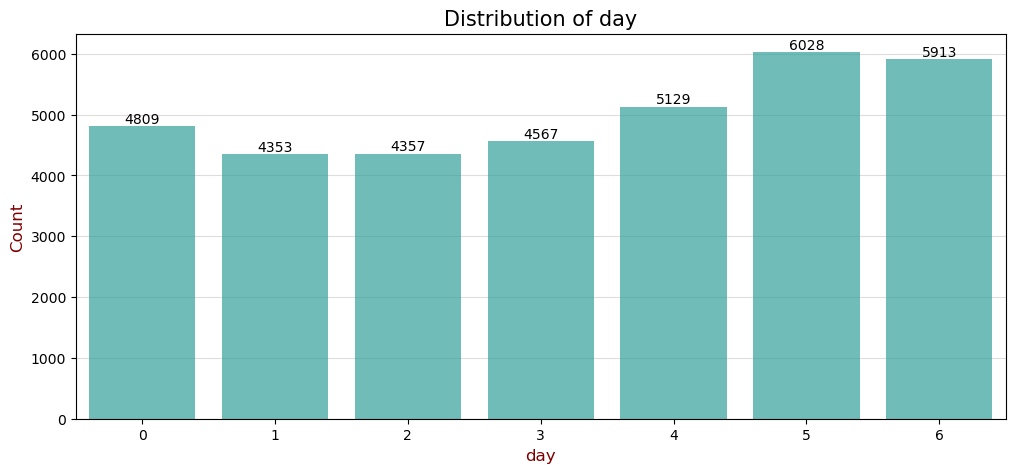

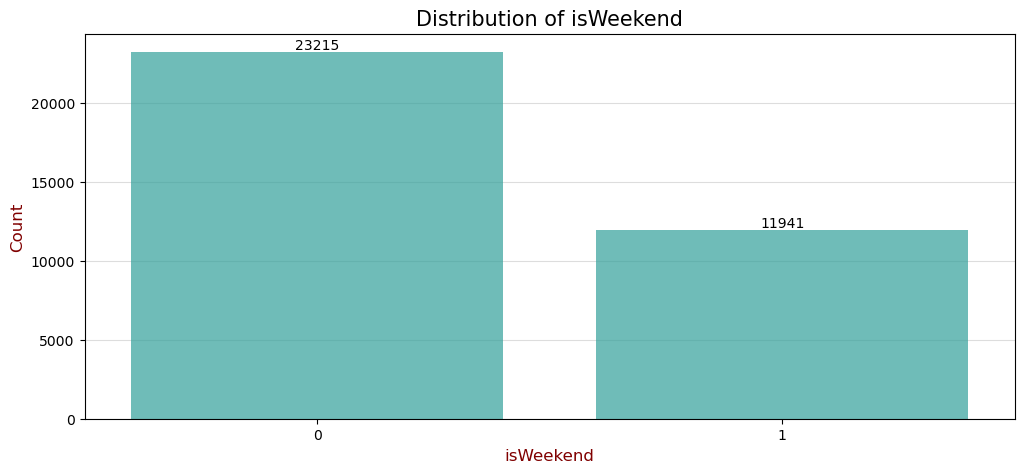

In [101]:
# Distribution of categorical columns

for col in cat_vars:
    plt.figure(figsize= (12,5))
    plt.grid(color= '#DDDDDD')

    ax = sns.barplot(data= df_test.groupby(col)[col].count(), color= 'lightseagreen', alpha= 0.7)

    ax.set_axisbelow(True)
    for i in ax.containers:
        ax.bar_label(i, )
    
    plt.title(f'Distribution of {col}', fontdict= {'fontsize': 15, 'fontweight': 50})
    plt.xlabel(f'{col}', fontdict= {'fontsize': 12, 'fontweight': 50, 'color': 'Maroon'})
    plt.ylabel('Count', fontdict= {'fontsize': 12, 'fontweight': 50, 'color': 'Maroon'})

    plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

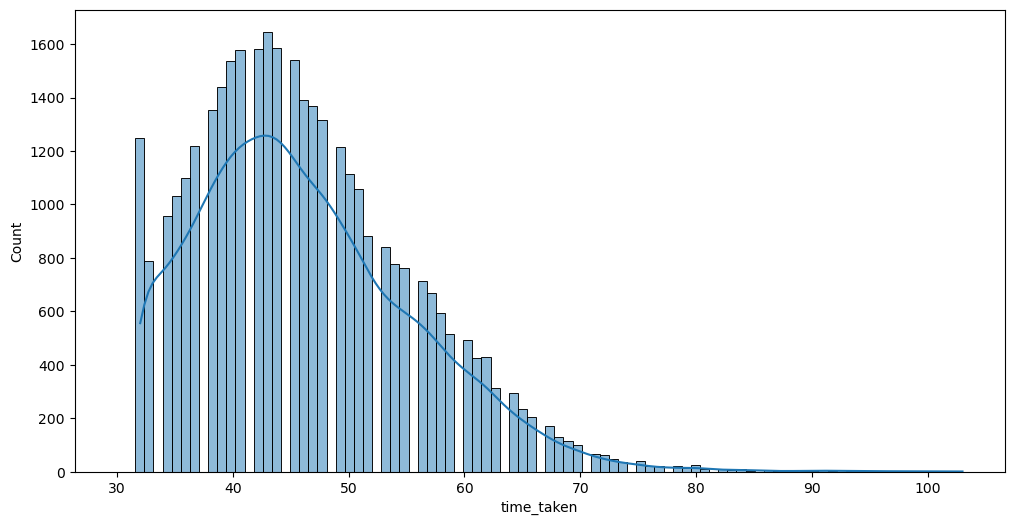

In [104]:
# Distribution of time_taken

plt.figure(figsize= (12,6))
sns.histplot(df_test['time_taken'], kde= True, binrange=[30,100])

plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

<Figure size 1200x600 with 0 Axes>

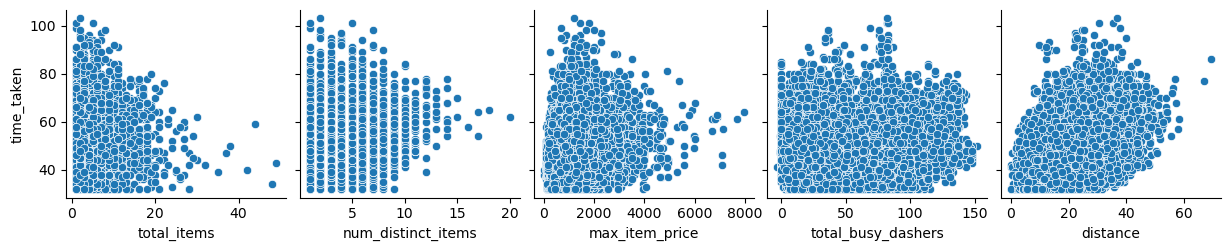

<Figure size 1200x600 with 0 Axes>

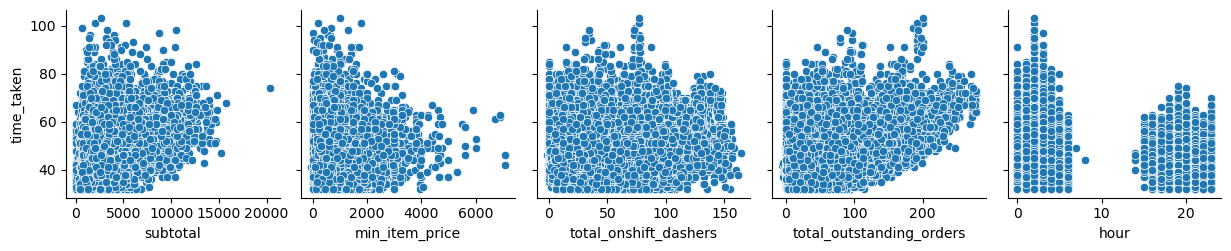

In [107]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize= (12,6))
sns.pairplot(data= df_test, x_vars= num_vars[::2], y_vars= 'time_taken')
plt.show()

plt.figure(figsize= (12,6))
sns.pairplot(data= df_test, x_vars= num_vars[1::2], y_vars= 'time_taken')
plt.show()


#### **4.3** Drop the columns with weak correlations with the target variable

In [110]:
# Drop the weakly correlated columns from training dataset

weak_corr_vars = ['min_item_price', 'total_onshift_dashers']
df_test.drop(columns= weak_corr_vars, inplace= True)

unnecesary_cat_vars = ['store_primary_category', 'day']
df_test.drop(columns= unnecesary_cat_vars, inplace= True)

# updating list of numerical features 
num_vars = [item for item in num_vars if item not in weak_corr_vars]
cat_vars = [item for item in cat_vars if item not in unnecesary_cat_vars]


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [114]:
# Import libraries

from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [117]:
# Encoding the categorical variables
df_train = pd.get_dummies(df_train, columns= ['market_id', 'order_protocol'], drop_first= True, dtype= int)
df_test = pd.get_dummies(df_test, columns= ['market_id', 'order_protocol'], drop_first= True, dtype= int)

In [119]:
# Apply scaling to the numerical columns

scaler = MinMaxScaler()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [121]:
df_train.head(3)

total_items  subtotal  num_distinct_items  max_item_price  \
92179      0.333333  0.596026                 0.4        0.629496   
172804     0.500000  0.241391                 0.6        0.179856   
67246      0.166667  0.428808                 0.0        0.582284   

        total_busy_dashers  total_outstanding_orders  distance  time_taken  \
92179             0.321168                  0.404255  0.638677        59.0   
172804            0.437956                  0.292553  0.456319        37.0   
67246             0.474453                  0.398936  0.396098        43.0   

            hour  isWeekend  ...  market_id_3  market_id_4  market_id_5  \
92179   0.130435          0  ...            0            0            0   
172804  0.826087          0  ...            0            0            0   
67246   0.130435          0  ...            0            0            0   

        market_id_6  order_protocol_2  order_protocol_3  order_protocol_4  \
92179             0                 1                 0                 0   
172804            0                 0                 1                 0   
67246             0                 0                 0                 0   

        order_protocol_5  order_protocol_6  order_protocol_7  
92179                  0                 0                 0  
172804                 0                 0                 0  
67246                  0                 0                 0  

[3 rows x 21 columns]

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [126]:
# Create/Initialise the model

y_train = df_train.pop('time_taken')
X_train = df_train.copy(deep= True)
X_train_lm = sm.add_constant(X_train)

In [128]:
y_test = df_test.pop('time_taken')
X_test = df_test.copy(deep= True)

In [130]:
# Train the model using the training data

regressor_1 = sm.OLS(y_train, X_train_lm).fit()
regressor_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             time_taken   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                 1.691e+04
Date:                Sat, 26 Apr 2025   Prob (F-statistic):               0.00
Time:                        03:43:22   Log-Likelihood:            -3.3618e+05
No. Observations:              118817   AIC:                         6.724e+05
Df Residuals:                  118796   BIC:                         6.726e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       36.2470      0.064    567.810      0.000      36.122      36.372
total_items                 -0.4626      0.122     -3.801      0.000      -0.701      -0.224
subtotal                     7.4585      0.119     62.827      0.000       7.226       7.691
num_distinct_items           2.5987      0.106     24.405      0.000       2.390       2.807
max_item_price               1.0133      0.104      9.759      0.000       0.810       1.217
total_busy_dashers         -41.3279      0.154   -267.670      0.000     -41.630     -41.025
total_outstanding_orders    43.8858      0.136    323.238      0.000      43.620      44.152
distance                    22.3374      0.065    342.014      0.000      22.209      22.465
hour                        -3.5484      0.035   -101.538      0.000      -3.617      -3.480
isWeekend                    1.7897      0.025     70.294      0.000       1.740       1.840
market_id_2                 -6.1316      0.038   -160.966      0.000      -6.206      -6.057
market_id_3                 -4.3770      0.043   -102.986      0.000      -4.460      -4.294
market_id_4                 -4.5576      0.039   -115.476      0.000      -4.635      -4.480
market_id_5                 -4.1744      0.045    -92.319      0.000      -4.263      -4.086
market_id_6                 -3.2916      0.198    -16.632      0.000      -3.679      -2.904
order_protocol_2            -0.6174      0.042    -14.702      0.000      -0.700      -0.535
order_protocol_3            -1.4637      0.034    -43.434      0.000      -1.530      -1.398
order_protocol_4            -1.8478      0.046    -39.781      0.000      -1.939      -1.757
order_protocol_5            -2.9124      0.034    -84.434      0.000      -2.980      -2.845
order_protocol_6            -1.6089      0.188     -8.543      0.000      -1.978      -1.240
order_protocol_7            -0.7425      1.184     -0.627      0.531      -3.063       1.578
==============================================================================
Omnibus:                     2755.263   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6262.216
Skew:                           0.065   Prob(JB):                         0.00
Kurtosis:                       4.117   Cond. No.                         161.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Drop 'order_protocol_7' because of high P-value and rebuild the model

In [133]:
# Making second model

X = X_train
X.drop(columns= 'order_protocol_7', inplace= True)

# add constant
X_train_lm = sm.add_constant(X)

# Train the model
regressor_2 = sm.OLS(y_train, X_train_lm).fit()

#check summary
regressor_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             time_taken   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                 1.780e+04
Date:                Sat, 26 Apr 2025   Prob (F-statistic):               0.00
Time:                        03:43:30   Log-Likelihood:            -3.3618e+05
No. Observations:              118817   AIC:                         6.724e+05
Df Residuals:                  118797   BIC:                         6.726e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       36.2465      0.064    567.852      0.000      36.121      36.372
total_items                 -0.4621      0.122     -3.797      0.000      -0.701      -0.224
subtotal                     7.4580      0.119     62.824      0.000       7.225       7.691
num_distinct_items           2.5986      0.106     24.404      0.000       2.390       2.807
max_item_price               1.0138      0.104      9.764      0.000       0.810       1.217
total_busy_dashers         -41.3277      0.154   -267.670      0.000     -41.630     -41.025
total_outstanding_orders    43.8857      0.136    323.239      0.000      43.620      44.152
distance                    22.3378      0.065    342.035      0.000      22.210      22.466
hour                        -3.5484      0.035   -101.539      0.000      -3.617      -3.480
isWeekend                    1.7897      0.025     70.298      0.000       1.740       1.840
market_id_2                 -6.1317      0.038   -160.969      0.000      -6.206      -6.057
market_id_3                 -4.3770      0.043   -102.986      0.000      -4.460      -4.294
market_id_4                 -4.5577      0.039   -115.479      0.000      -4.635      -4.480
market_id_5                 -4.1751      0.045    -92.365      0.000      -4.264      -4.087
market_id_6                 -3.2916      0.198    -16.632      0.000      -3.680      -2.904
order_protocol_2            -0.6172      0.042    -14.697      0.000      -0.699      -0.535
order_protocol_3            -1.4635      0.034    -43.430      0.000      -1.530      -1.397
order_protocol_4            -1.8474      0.046    -39.776      0.000      -1.938      -1.756
order_protocol_5            -2.9122      0.034    -84.432      0.000      -2.980      -2.845
order_protocol_6            -1.6086      0.188     -8.542      0.000      -1.978      -1.240
==============================================================================
Omnibus:                     2755.261   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6262.260
Skew:                           0.065   Prob(JB):                         0.00
Kurtosis:                       4.117   Cond. No.                         27.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
# check VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4         total_busy_dashers  24.29
5   total_outstanding_orders  19.60
1                   subtotal  17.67
3             max_item_price  14.51
0                total_items  14.06
2         num_distinct_items  10.98
6                   distance   5.99
9                market_id_2   3.03
11               market_id_4   2.77
7                       hour   2.22
15          order_protocol_3   2.03
17          order_protocol_5   1.89
8                  isWeekend   1.50
10               market_id_3   1.49
14          order_protocol_2   1.45
12               market_id_5   1.44
16          order_protocol_4   1.36
13               market_id_6   1.02
18          order_protocol_6   1.01

VIF is still very high, so we remove 'total_busy_dashers'

In [138]:
# Making third model

X.drop(columns= 'total_busy_dashers', inplace= True)

# add constant
X_train_lm = sm.add_constant(X)

# Train the model
regressor_3 = sm.OLS(y_train, X_train_lm).fit()

#check summary
regressor_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             time_taken   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     9239.
Date:                Sat, 26 Apr 2025   Prob (F-statistic):               0.00
Time:                        03:43:44   Log-Likelihood:            -3.6421e+05
No. Observations:              118817   AIC:                         7.285e+05
Df Residuals:                  118798   BIC:                         7.286e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       34.0295      0.080    424.652      0.000      33.872      34.187
total_items                 -0.3992      0.154     -2.591      0.010      -0.701      -0.097
subtotal                     7.2506      0.150     48.240      0.000       6.956       7.545
num_distinct_items           2.7204      0.135     20.179      0.000       2.456       2.985
max_item_price               0.7308      0.131      5.559      0.000       0.473       0.988
total_outstanding_orders    12.0738      0.083    145.281      0.000      11.911      12.237
distance                    22.0323      0.083    266.488      0.000      21.870      22.194
hour                        -2.8796      0.044    -65.249      0.000      -2.966      -2.793
isWeekend                    1.5612      0.032     48.459      0.000       1.498       1.624
market_id_2                 -7.9330      0.047   -167.111      0.000      -8.026      -7.840
market_id_3                 -4.2394      0.054    -78.789      0.000      -4.345      -4.134
market_id_4                 -6.0718      0.049   -122.775      0.000      -6.169      -5.975
market_id_5                 -3.7864      0.057    -66.194      0.000      -3.899      -3.674
market_id_6                 -4.0026      0.251    -15.975      0.000      -4.494      -3.512
order_protocol_2            -0.7314      0.053    -13.756      0.000      -0.836      -0.627
order_protocol_3            -1.6928      0.043    -39.689      0.000      -1.776      -1.609
order_protocol_4            -2.0547      0.059    -34.944      0.000      -2.170      -1.939
order_protocol_5            -3.3437      0.044    -76.650      0.000      -3.429      -3.258
order_protocol_6            -1.6494      0.238     -6.917      0.000      -2.117      -1.182
==============================================================================
Omnibus:                     1257.858   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1480.965
Skew:                           0.195   Prob(JB):                         0.00
Kurtosis:                       3.383   Cond. No.                         26.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The Adjusted R squared value has dropped from 0.74 to 0.58 which is significant

In [141]:
# check VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                   subtotal  17.66
3             max_item_price  14.38
0                total_items  14.04
2         num_distinct_items  10.97
5                   distance   5.95
4   total_outstanding_orders   4.37
8                market_id_2   2.92
10               market_id_4   2.70
6                       hour   2.22
14          order_protocol_3   2.03
16          order_protocol_5   1.88
7                  isWeekend   1.50
9                market_id_3   1.49
13          order_protocol_2   1.45
11               market_id_5   1.44
15          order_protocol_4   1.35
12               market_id_6   1.02
17          order_protocol_6   1.01

Remove 'subtotal' and make the model again

In [144]:
# Making fourth model

X.drop(columns= 'subtotal', inplace= True)

# add constant
X_train_lm = sm.add_constant(X)

# Train the model
regressor_4 = sm.OLS(y_train, X_train_lm).fit()

#check summary
regressor_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             time_taken   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     9461.
Date:                Sat, 26 Apr 2025   Prob (F-statistic):               0.00
Time:                        03:44:00   Log-Likelihood:            -3.6537e+05
No. Observations:              118817   AIC:                         7.308e+05
Df Residuals:                  118799   BIC:                         7.309e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       33.4821      0.080    418.001      0.000      33.325      33.639
total_items                  3.1758      0.136     23.284      0.000       2.908       3.443
num_distinct_items           3.0957      0.136     22.779      0.000       2.829       3.362
max_item_price               5.2086      0.094     55.417      0.000       5.024       5.393
total_outstanding_orders    12.1953      0.084    145.395      0.000      12.031      12.360
distance                    22.0735      0.083    264.423      0.000      21.910      22.237
hour                        -2.9777      0.045    -66.890      0.000      -3.065      -2.890
isWeekend                    1.5946      0.033     49.031      0.000       1.531       1.658
market_id_2                 -8.0043      0.048   -167.066      0.000      -8.098      -7.910
market_id_3                 -4.2140      0.054    -77.563      0.000      -4.320      -4.107
market_id_4                 -6.1107      0.050   -122.385      0.000      -6.209      -6.013
market_id_5                 -3.8548      0.058    -66.760      0.000      -3.968      -3.742
market_id_6                 -4.0574      0.253    -16.037      0.000      -4.553      -3.562
order_protocol_2            -0.6899      0.054    -12.852      0.000      -0.795      -0.585
order_protocol_3            -1.6743      0.043    -38.876      0.000      -1.759      -1.590
order_protocol_4            -2.3061      0.059    -38.996      0.000      -2.422      -2.190
order_protocol_5            -3.2813      0.044    -74.526      0.000      -3.368      -3.195
order_protocol_6            -1.4832      0.241     -6.161      0.000      -1.955      -1.011
==============================================================================
Omnibus:                     1241.871   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1432.489
Skew:                           0.200   Prob(JB):                    8.69e-312
Kurtosis:                       3.359   Cond. No.                         25.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
# check VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                total_items  11.00
1         num_distinct_items  10.93
2             max_item_price   6.25
4                   distance   5.93
3   total_outstanding_orders   4.37
7                market_id_2   2.91
9                market_id_4   2.70
5                       hour   2.19
13          order_protocol_3   2.03
15          order_protocol_5   1.88
6                  isWeekend   1.50
8                market_id_3   1.49
12          order_protocol_2   1.45
10               market_id_5   1.43
14          order_protocol_4   1.32
11               market_id_6   1.02
16          order_protocol_6   1.01

Remove 'total_items' and make the total again

In [149]:
# Making fifth model

X.drop(columns= 'total_items', inplace= True)

# add constant
X_train_lm = sm.add_constant(X)

# Train the model
regressor_5 = sm.OLS(y_train, X_train_lm).fit()

#check summary
regressor_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             time_taken   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     9973.
Date:                Sat, 26 Apr 2025   Prob (F-statistic):               0.00
Time:                        03:44:13   Log-Likelihood:            -3.6564e+05
No. Observations:              118817   AIC:                         7.313e+05
Df Residuals:                  118800   BIC:                         7.315e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       33.8126      0.079    427.942      0.000      33.658      33.967
num_distinct_items           5.8989      0.063     93.329      0.000       5.775       6.023
max_item_price               4.7917      0.092     51.815      0.000       4.610       4.973
total_outstanding_orders    12.2067      0.084    145.202      0.000      12.042      12.371
distance                    22.0771      0.084    263.867      0.000      21.913      22.241
hour                        -3.0109      0.045    -67.517      0.000      -3.098      -2.923
isWeekend                    1.6062      0.033     49.279      0.000       1.542       1.670
market_id_2                 -7.9998      0.048   -166.595      0.000      -8.094      -7.906
market_id_3                 -4.2213      0.054    -77.523      0.000      -4.328      -4.115
market_id_4                 -6.1121      0.050   -122.135      0.000      -6.210      -6.014
market_id_5                 -3.8770      0.058    -67.000      0.000      -3.990      -3.764
market_id_6                 -4.0547      0.254    -15.990      0.000      -4.552      -3.558
order_protocol_2            -0.6854      0.054    -12.739      0.000      -0.791      -0.580
order_protocol_3            -1.6800      0.043    -38.921      0.000      -1.765      -1.595
order_protocol_4            -2.2504      0.059    -37.998      0.000      -2.366      -2.134
order_protocol_5            -3.2835      0.044    -74.408      0.000      -3.370      -3.197
order_protocol_6            -1.4318      0.241     -5.934      0.000      -1.905      -0.959
==============================================================================
Omnibus:                     1249.686   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1434.728
Skew:                           0.203   Prob(JB):                         0.00
Kurtosis:                       3.354   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
# check VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1             max_item_price  6.18
3                   distance  5.89
2   total_outstanding_orders  4.36
6                market_id_2  2.91
8                market_id_4  2.70
0         num_distinct_items  2.25
4                       hour  2.19
12          order_protocol_3  2.03
14          order_protocol_5  1.88
5                  isWeekend  1.50
7                market_id_3  1.48
11          order_protocol_2  1.45
9                market_id_5  1.43
13          order_protocol_4  1.31
10               market_id_6  1.02
15          order_protocol_6  1.01

Remove 'max_item_price' and make the model again

In [154]:
# Making sixth model

X.drop(columns= 'max_item_price', inplace= True)

# add constant
X_train_lm = sm.add_constant(X)

# Train the model
regressor_6 = sm.OLS(y_train, X_train_lm).fit()

#check summary
regressor_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             time_taken   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                 1.023e+04
Date:                Sat, 26 Apr 2025   Prob (F-statistic):               0.00
Time:                        03:44:25   Log-Likelihood:            -3.6696e+05
No. Observations:              118817   AIC:                         7.340e+05
Df Residuals:                  118801   BIC:                         7.341e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       36.2728      0.064    567.967      0.000      36.148      36.398
num_distinct_items           5.9669      0.064     93.377      0.000       5.842       6.092
total_outstanding_orders    12.4745      0.085    147.017      0.000      12.308      12.641
distance                    22.1181      0.085    261.432      0.000      21.952      22.284
hour                        -3.3486      0.045    -75.062      0.000      -3.436      -3.261
isWeekend                    1.6724      0.033     50.780      0.000       1.608       1.737
market_id_2                 -8.0839      0.049   -166.572      0.000      -8.179      -7.989
market_id_3                 -4.2956      0.055    -78.040      0.000      -4.404      -4.188
market_id_4                 -6.1256      0.051   -121.047      0.000      -6.225      -6.026
market_id_5                 -3.8894      0.059    -66.468      0.000      -4.004      -3.775
market_id_6                 -4.1403      0.256    -16.147      0.000      -4.643      -3.638
order_protocol_2            -0.8502      0.054    -15.655      0.000      -0.957      -0.744
order_protocol_3            -1.6946      0.044    -38.826      0.000      -1.780      -1.609
order_protocol_4            -3.1097      0.057    -54.088      0.000      -3.222      -2.997
order_protocol_5            -3.3546      0.045    -75.210      0.000      -3.442      -3.267
order_protocol_6            -1.8693      0.244     -7.666      0.000      -2.347      -1.391
==============================================================================
Omnibus:                     1280.096   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1453.953
Skew:                           0.209   Prob(JB):                         0.00
Kurtosis:                       3.344   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
# check VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                   distance  4.99
1   total_outstanding_orders  4.09
5                market_id_2  2.90
7                market_id_4  2.68
0         num_distinct_items  2.16
3                       hour  2.16
11          order_protocol_3  1.98
13          order_protocol_5  1.84
4                  isWeekend  1.48
10          order_protocol_2  1.44
6                market_id_3  1.43
8                market_id_5  1.39
12          order_protocol_4  1.30
9                market_id_6  1.02
14          order_protocol_6  1.01

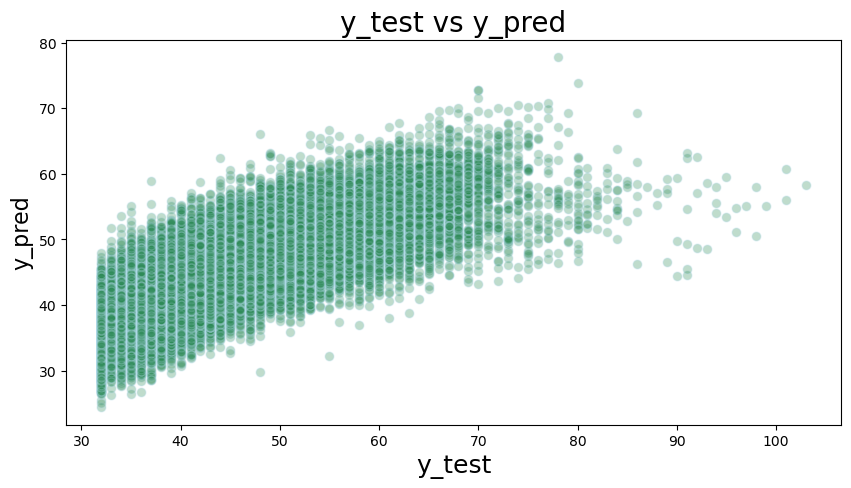

In [158]:
# Make predictions

X_test_lm = X_test[X.columns]
X_test_lm = sm.add_constant(X_test_lm)
y_pred_lm = regressor_6.predict(X_test_lm)

plt.figure(figsize= (10,5))
plt.scatter(y_test, y_pred_lm, alpha= 0.3, s=40, edgecolors= 'lightblue', c= 'seagreen')
plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [160]:
# Find results for evaluation metrics

mae = mean_absolute_error(y_test, y_pred_lm)
mse = mean_squared_error(y_test, y_pred_lm)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lm)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 4.6028
Mean Squared Error (MSE): 37.0395
Root Mean Squared Error (RMSE): 6.0860
R-squared (R²): 0.5731


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

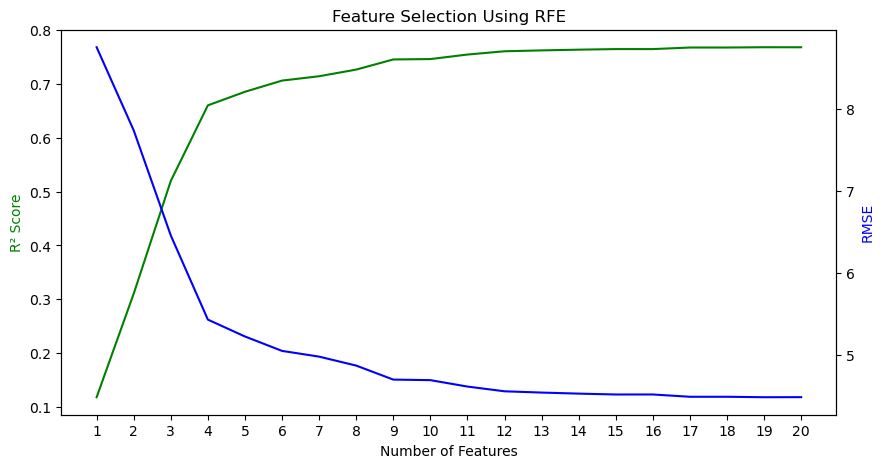

In [165]:
# Loop through the number of features and test the model

X_train = df_train

# Initialize model
model = LinearRegression()

# Store results
num_features_list = []
r2_scores = []
rmse_scores = []

# Loop through different numbers of features
for n_features in range(1, len(X_train.columns) + 1):
    rfe = RFE(estimator=model, n_features_to_select=n_features)
    rfe.fit(X_train, y_train)
    
    # Get selected features
    selected_features = X_train.columns[rfe.support_]
    
    # Train model with selected features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    
    # Calculate metrics
    r2 = r2_score(y_true= y_test, y_pred= y_pred)
    rmse = mean_squared_error(y_true= y_test, y_pred= y_pred, squared=False)  # RMSE
    
    # Store results
    num_features_list.append(n_features)
    r2_scores.append(r2)
    rmse_scores.append(rmse)

# Plot R² and RMSE vs. Number of Features
fig, ax1 = plt.subplots(figsize=(10, 5))

ax2 = ax1.twinx()
ax1.plot(num_features_list, r2_scores, 'g-')
ax2.plot(num_features_list, rmse_scores, 'b-')

ax1.set_xlabel('Number of Features')
ax1.set_ylabel('R² Score', color='g')
ax2.set_ylabel('RMSE', color='b')
plt.xticks(range(1,21))

plt.title('Feature Selection Using RFE')
plt.show()

In [167]:
# Build the final model with selected number of features

# Running RFE with the output number of the variable equal to 9
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select= 9)             # running RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]
# print(col)

# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# X_train_rfe = X_train_rfe.drop(columns= 'total_busy_dashers')
X_train_rfe = sm.add_constant(X_train_rfe)

regressor_rfe = sm.OLS(y_train,X_train_rfe).fit()  
regressor_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             time_taken   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                 3.205e+04
Date:                Sat, 26 Apr 2025   Prob (F-statistic):               0.00
Time:                        03:45:49   Log-Likelihood:            -3.4303e+05
No. Observations:              118817   AIC:                         6.861e+05
Df Residuals:                  118807   BIC:                         6.862e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       35.6198      0.054    660.160      0.000      35.514      35.726
subtotal                    10.2240      0.065    156.492      0.000      10.096      10.352
total_busy_dashers         -41.6932      0.163   -255.410      0.000     -42.013     -41.373
total_outstanding_orders    43.8946      0.144    305.204      0.000      43.613      44.177
distance                    22.4652      0.069    325.035      0.000      22.330      22.601
hour                        -3.5463      0.037    -96.389      0.000      -3.618      -3.474
market_id_2                 -6.3177      0.040   -159.254      0.000      -6.395      -6.240
market_id_3                 -4.1254      0.045    -92.133      0.000      -4.213      -4.038
market_id_4                 -4.7784      0.041   -116.925      0.000      -4.859      -4.698
market_id_5                 -3.7976      0.047    -80.028      0.000      -3.891      -3.705
==============================================================================
Omnibus:                     1900.013   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3789.418
Skew:                           0.007   Prob(JB):                         0.00
Kurtosis:                       3.875   Cond. No.                         23.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

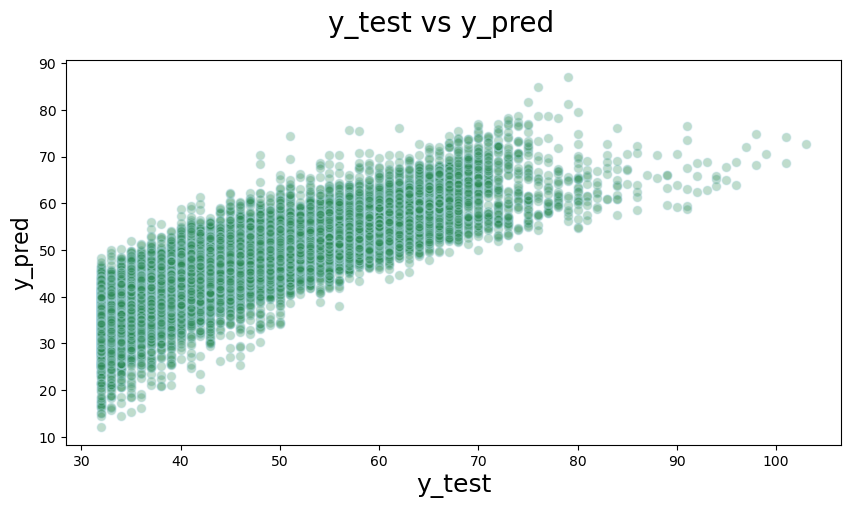

In [169]:
# Make predictions

X_test_new = X_test[col]
X_test_new = sm.add_constant(X_test_new)
y_pred = regressor_rfe.predict(X_test_new)

fig = plt.figure(figsize= (10,5))
plt.scatter(y_test, y_pred, alpha= 0.3, s=40, edgecolors= 'lightblue', c= 'seagreen')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [171]:
# Find results for evaluation metrics

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 3.4838
Mean Squared Error (MSE): 22.0711
Root Mean Squared Error (RMSE): 4.6980
R-squared (R²): 0.7456


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

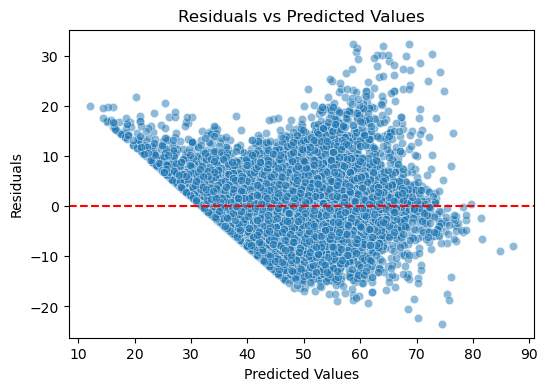

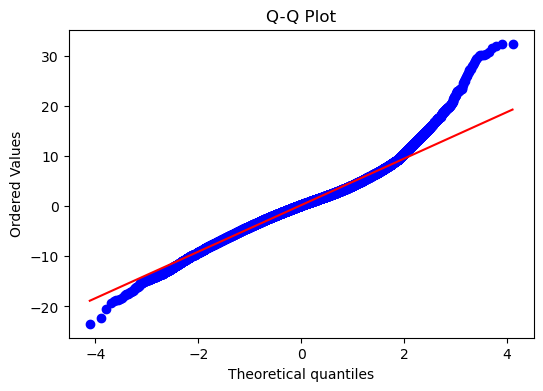

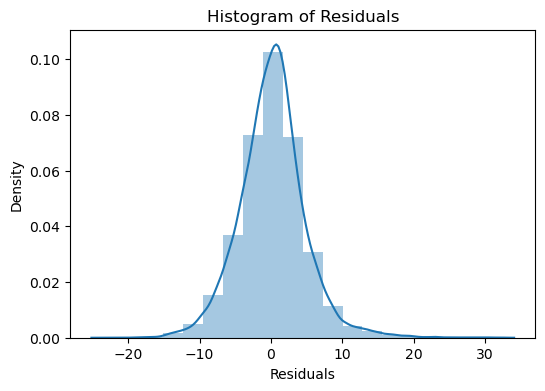

In [175]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
import scipy.stats as stats

# Calculate residuals
residuals = y_test - y_pred

# 1. Residuals vs Predicted Values
plt.figure(figsize= (6, 4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

# 2. Q-Q Plot (Normality Check)
plt.figure(figsize= (6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

# 3. Residual Histogram
plt.figure(figsize= (6, 4))
sns.distplot(residuals, bins = 20)
# fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
# plt.xlabel('Errors', fontsize = 18)  
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Histogram of Residuals")
plt.show()

[Your inferences here:]
>- The residual vs predicted values scatter plot shows that the residuals are scattered uniformly along the mean value of zero. One can say that the residuals along the lower values of perdicted values are higher as compared to residual values for bigger preidcted values. But the mean seems to be around which is one of the assumption of linear regression.
>- Q-Q plot compares the quantiles of two distributions. The deviation froma straigh line in Q-Q plot indicates some dfference in the distribution but majorly it follows a straight line which is a good indication for model fit.
>- Histogram of the residuals shows that the residuals have a normal distribution with the mean value around 0 which is assumption of linear regression model and the chosen model follows this assumption.   


#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


Unscaled Coefficients  Scaled Coefficients
total_busy_dashers                 -5711.972815           -41.693232
total_outstanding_orders            8252.188509            43.894620
distance                            1059.460963            22.465245
hour                                 -81.564298            -3.546274

<Figure size 1000x1000 with 0 Axes>

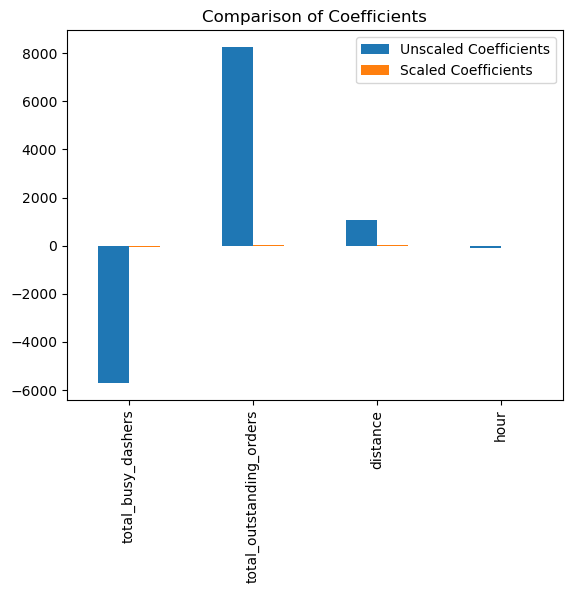

In [180]:
# Compare the scaled vs unscaled features used in the final model

scaling_factor = pd.Series(scaler.scale_, index= scaler.get_feature_names_out())
scaling_factor = scaling_factor.loc[['total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour']]
# Unscaled coefficients
scaled_coefficients = regressor_rfe.params.loc[['total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour']]

# Scaled coefficients
unscaled_coefficients = scaled_coefficients / scaling_factor

# Combine both for comparison
comparison = pd.DataFrame({
    'Unscaled Coefficients': unscaled_coefficients,
    'Scaled Coefficients': scaled_coefficients
})

display(comparison)

# Plot the coefficients 
plt.figure(figsize=(10, 10))
comparison.plot(kind='bar')
plt.title('Comparison of Coefficients')
plt.show()

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [183]:
# Analyze the effect of a unit change in a feature, say 'total_items'

# Check if 'total_items' exists in the DataFrame
if 'total_items' in X_train_rfe.columns:
	# Calculate the standard deviation of 'total_items' in the original scale
	std_total_items = X_train_rfe['total_items'].std()

	# Get the scaled coefficient for 'total_items'
	scaled_coefficient_total_items = scaled_coefficients.get('total_items', None)

	if scaled_coefficient_total_items is not None:
		# Calculate the effect of a unit change in 'total_items'
		effect_unit_change = scaled_coefficient_total_items * std_total_items
		print(f"Effect of a unit change in 'total_items' on the target variable: {effect_unit_change}")
	else:
		print("Scaled coefficient for 'total_items' is not available.")
else:
	print("'total_items' column is not present in the DataFrame.")


'total_items' column is not present in the DataFrame.


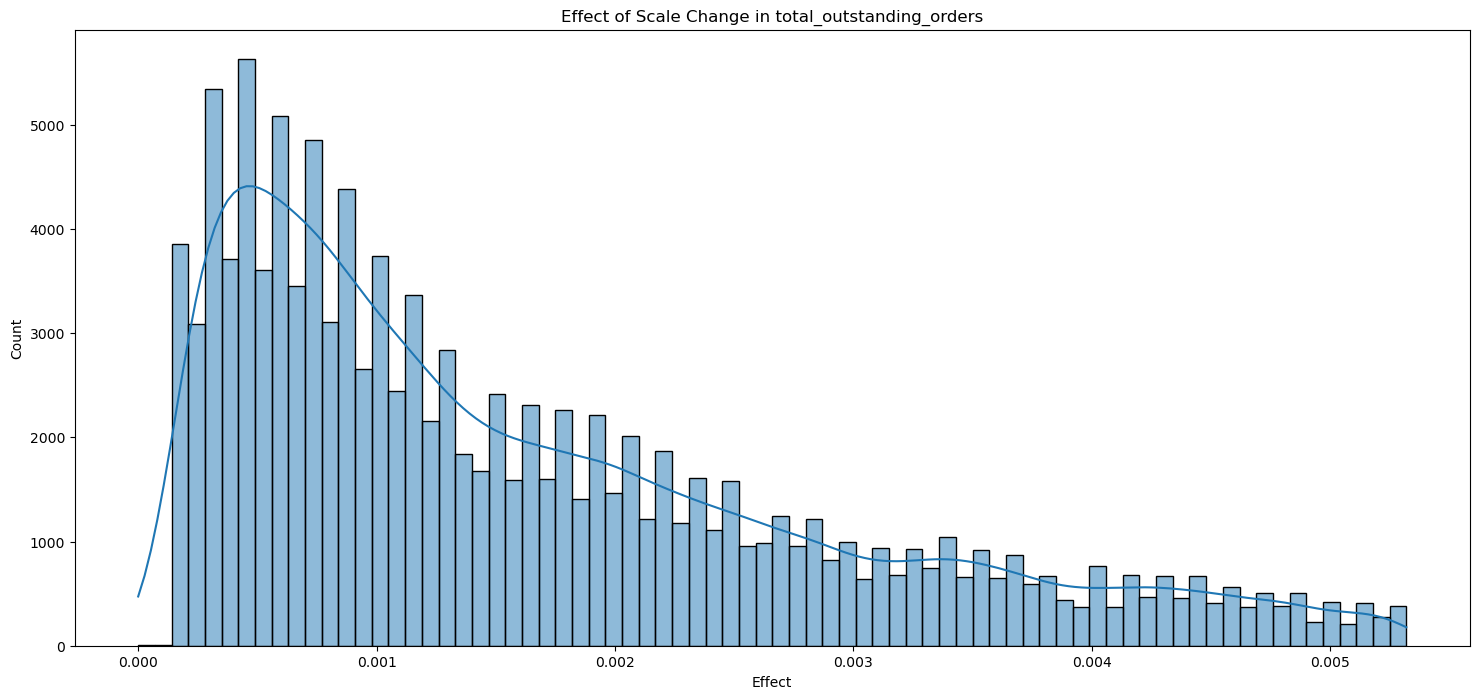

In [185]:
# Get the scaled coefficient for 'total_outstanding_orders' as total_item is removed from the model 

scaled_coefficient = X_train['total_outstanding_orders']

# Rescale the coefficient to interpret it in terms of the original feature
original_scale_effect = scaled_coefficient * scaler.scale_[num_vars.index('total_outstanding_orders')]

# Visualise the effect of scale change in the total_outstanding_orders feature 

plt.figure(figsize=(18, 8))
sns.histplot(original_scale_effect, kde=True)
plt.title('Effect of Scale Change in total_outstanding_orders')
plt.xlabel('Effect')
plt.show() 

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**

Yes, there are categorical variables in the dataset. The categorical variables are:

- `market_id`
- `store_primary_category`
- `order_protocol`
- `day`
- `isWeekend`

### Inference:
1. `market_id`: Different markets may have varying delivery times due to geographical factors, traffic conditions, or operational efficiency. This variable can significantly affect the dependent variable as seen in the models built.

2. `store_primary_category`: The type of store (e.g., restaurant, grocery) can influence delivery time. For example, groceries may have shorter preparation times compared to restaurants.

3. `order_protocol`: The protocol used for placing orders (e.g., online, phone) might impact the time taken for processing and delivery.

4. `day`: Delivery times may vary across different days of the week due to changes in demand patterns. For instance, weekends might have higher demand, leading to longer delivery times.

5. `isWeekend`: This binary variable indicates whether the order was placed on a weekend. Weekends might have higher traffic or demand, potentially increasing delivery times.

These categorical variables were dummy encoded to make them suitable for regression analysis. Their effects on the dependent variable were analyzed through feature selection techniques like Recursive Feature Elimination (RFE) and Coreelation analysis.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>The parameter `test_size= 0.2` in train-test splitting refers to allocating 20% of the dataset to the test set and 80% to the training set. This ensures that the model is trained on a larger portion of the data while keeping a separate set for evaluation. It helps assess model performance on unseen data, which helps to validate the real performance of the model.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> Looking at the heatmap, the feature `distance` has the highest correlation with the target variable `time_taken`. The correlation coefficient between `distance` and `time_taken` is 0.46, indicating a moderate positive correlation.




---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> To detect outliers, I used boxplots to visualize the distribution of numerical features and identify potential outliers. I looked for data points that were significantly higher or lower than the rest of the data. To address the outliers, I used the IQR method to filter out data points that were considered outliers based on the IQR range. This method helped in removing extreme values that could affect the model's performance.<br>
> IQR Method: Defined outliers as values outside `(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)`



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**

> Based on the final model, the top 3 features significantly affecting the delivery time are `distance`, `total_busy_dashers` and `total_outstanding_orders`. These features have the highest coefficients in the model, indicating a strong influence on the delivery time.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**

>#### Introduction
Linear Regression is a fundamental statistical and machine learning algorithm used for modeling relationships between a dependent variable and one or more independent variables. It is widely used for predictive analysis.

>#### Types of Linear Regression
>>1. **Simple Linear Regression**: Models the relationship between one independent variable and one dependent variable.
>>2. **Multiple Linear Regression**: Models the relationship between multiple independent variables and a dependent variable.


>#### Assumptions of Linear Regression
>>1. **Linearity**: The relationship between dependent and independent variables is linear.
>>2. **Independence**: Observations are independent of each other.
>>3. **Homoscedasticity**: Constant variance of residuals across all levels of independent variables.
>>4. **Normality of Errors**: Residuals (errors) should be normally distributed.
>>5. **No Multicollinearity**: Independent variables should not be highly correlated in multiple linear regression.


>#### Applications of Linear Regression
>>- Predicting house prices
>>- Sales forecasting
>>- Risk assessment in finance
>>- Medical research (e.g., predicting disease progression)

>#### Conclusion
>>Linear Regression is a powerful yet simple algorithm for predicting continuous outcomes. Understanding its assumptions, cost function, and optimization techniques like gradient descent ensures effective implementation in real-world applications.





---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
> **Simple linear regression** is a statistical method that allows us to summarize and study the relationship between two continuous (quantitative) variables. It involves predicting a dependent variable based on a single independent variable.<br>
> **Multiple linear regression** is an extension of simple linear regression that allows us to predict a dependent variable based on multiple independent variables. It involves fitting a linear equation to the data by considering the combined effect of multiple predictors on the target variable.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**

> The cost function in linear regression is used to measure the error or the difference between the predicted values and the actual values of the target variable. The goal of linear regression is to minimize this cost function to find the best-fitting line that represents the relationship between the independent and dependent variables. The cost function is minimized using optimization algorithms such as gradient descent, which iteratively adjusts the model parameters to reduce the error and converge to the optimal solution.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting occurs when a model learns too much from the training data, including noise and random fluctuations, making it perform well on training data but poorly on unseen test data.
>>- High accuracy on training data but low accuracy on test data.
>>- The model is too complex (too many features or too flexible).
>>- The model captures noise instead of general patterns.

>Underfitting occurs when a model is too simple to capture the underlying pattern in the data, leading to poor performance on both training and test data.
>>- Low accuracy on both training and test sets.
>>- The model fails to capture relationships in data.
>>- The predictions are too generic.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>A residual plot is a key diagnostic tool in regression analysis. It helps evaluate whether the assumptions of linear regression hold and whether the model fits the data well.A residual is the difference between the actual and predicted values.A good regression model should have residuals that are randomly distributed with no patterns.A good linear regression model should have residuals that are random, homoscedastic, and normally distributed.